In [54]:
from re import L
import numpy as np
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#### Get The Data

In [2]:
df=pd.read_csv('/content/MyExamples/bike_sales_india.csv')
df.head(10)

State  Avg Daily Distance (km)          Brand          Model  \
0       Karnataka                    68.84  Royal Enfield     Hunter 350   
1       Rajasthan                    23.80          Bajaj    Dominar 400   
2  Madhya Pradesh                    27.67            KTM       125 Duke   
3       Karnataka                    62.85       Kawasaki      Ninja 300   
4  Madhya Pradesh                    10.62         Yamaha          FZ V3   
5     Maharashtra                    47.71           Hero  Splendor Plus   
6     Maharashtra                    77.95  Royal Enfield     Meteor 350   
7      Tamil Nadu                    11.57       Kawasaki       Vulcan S   
8          Punjab                    78.63            KTM  390 Adventure   
9       Rajasthan                    22.94           Hero      HF Deluxe   

   Price (INR)  Year of Manufacture  Engine Capacity (cc) Fuel Type  \
0       252816                 2021                   672  Electric   
1       131100                 2020                   769    Hybrid   
2       201016                 2020                   216    Hybrid   
3       132482                 2021                   556    Petrol   
4       231796                 2019                   298    Petrol   
5        60839                 2019                   386  Electric   
6       349740                 2022                   970    Petrol   
7       193781                 2019                   375  Electric   
8       145538                 2022                   330  Electric   
9       227055                 2024                   626    Hybrid   

   Mileage (km/l) Owner Type  Registration Year Insurance Status Seller Type  \
0           78.41     Second               2024           Active  Individual   
1           89.98      Third               2023           Active  Individual   
2           71.46     Second               2023           Active      Dealer   
3           51.73      Third               2021           Active      Dealer   
4           54.72      Third               2019    Not Available  Individual   
5           92.08      First               2019    Not Available      Dealer   
6           58.28      First               2022          Expired  Individual   
7           61.48     Second               2022          Expired      Dealer   
8           89.76     Second               2023           Active      Dealer   
9           68.13      Third               2024           Active  Individual   

   Resale Price (INR) City Tier  
0           149934.18    Tier 3  
1            66960.30    Tier 3  
2           141522.64    Tier 3  
3            56057.22    Tier 1  
4           132538.36    Tier 3  
5            47466.45    Tier 3  
6           175038.79     Metro  
7            96676.39    Tier 3  
8           103908.96    Tier 2  
9           146320.50    Tier 3

In [55]:
df.shape

(10000, 30)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            10000 non-null  object 
 1   Avg Daily Distance (km)          10000 non-null  float64
 2   Brand                            10000 non-null  object 
 3   Model                            10000 non-null  object 
 4   Price (INR)                      10000 non-null  int64  
 5   Year of Manufacture              10000 non-null  int64  
 6   Engine Capacity (cc)             10000 non-null  int64  
 7   Fuel Type                        10000 non-null  object 
 8   Mileage (km/l)                   10000 non-null  float64
 9   Owner Type                       10000 non-null  object 
 10  Registration Year                10000 non-null  int64  
 11  Insurance Status                 10000 non-null  object 
 12  Seller Type        

In [5]:
#Categorical Columns
df_cat=df.select_dtypes(include='object')
display(df_cat.head(10))

State          Brand          Model Fuel Type Owner Type  \
0       Karnataka  Royal Enfield     Hunter 350  Electric     Second   
1       Rajasthan          Bajaj    Dominar 400    Hybrid      Third   
2  Madhya Pradesh            KTM       125 Duke    Hybrid     Second   
3       Karnataka       Kawasaki      Ninja 300    Petrol      Third   
4  Madhya Pradesh         Yamaha          FZ V3    Petrol      Third   
5     Maharashtra           Hero  Splendor Plus  Electric      First   
6     Maharashtra  Royal Enfield     Meteor 350    Petrol      First   
7      Tamil Nadu       Kawasaki       Vulcan S  Electric     Second   
8          Punjab            KTM  390 Adventure  Electric     Second   
9       Rajasthan           Hero      HF Deluxe    Hybrid      Third   

  Insurance Status Seller Type City Tier  
0           Active  Individual    Tier 3  
1           Active  Individual    Tier 3  
2           Active      Dealer    Tier 3  
3           Active      Dealer    Tier 1  
4    Not Available  Individual    Tier 3  
5    Not Available      Dealer    Tier 3  
6          Expired  Individual     Metro  
7          Expired      Dealer    Tier 3  
8           Active      Dealer    Tier 2  
9           Active  Individual    Tier 3

In [6]:
#Numerical Columns
df_num=df.select_dtypes(include=['int64','float64'])
display(df_num.head(10))

Avg Daily Distance (km)  Price (INR)  Year of Manufacture  \
0                    68.84       252816                 2021   
1                    23.80       131100                 2020   
2                    27.67       201016                 2020   
3                    62.85       132482                 2021   
4                    10.62       231796                 2019   
5                    47.71        60839                 2019   
6                    77.95       349740                 2022   
7                    11.57       193781                 2019   
8                    78.63       145538                 2022   
9                    22.94       227055                 2024   

   Engine Capacity (cc)  Mileage (km/l)  Registration Year  Resale Price (INR)  
0                   672           78.41               2024           149934.18  
1                   769           89.98               2023            66960.30  
2                   216           71.46               2023           141522.64  
3                   556           51.73               2021            56057.22  
4                   298           54.72               2019           132538.36  
5                   386           92.08               2019            47466.45  
6                   970           58.28               2022           175038.79  
7                   375           61.48               2022            96676.39  
8                   330           89.76               2023           103908.96  
9                   626           68.13               2024           146320.50

In [7]:
# Showing Unique values ​​and their frequency for categorical columns
for col in df_cat.columns:
  print(f"\nThese are Unique Values and Their Frequencies for '{col}' column")
  display(df_cat[col].value_counts())


These are Unique Values and Their Frequencies for 'State' column


State
Punjab            1051
Maharashtra       1030
Rajasthan         1017
Uttar Pradesh     1003
Gujarat           1002
Tamil Nadu         994
Karnataka          982
Delhi              977
Madhya Pradesh     973
West Bengal        971
Name: count, dtype: int64


These are Unique Values and Their Frequencies for 'Brand' column


Brand
Kawasaki         1291
Yamaha           1283
KTM              1272
Royal Enfield    1253
Hero             1239
TVS              1234
Honda            1221
Bajaj            1207
Name: count, dtype: int64


These are Unique Values and Their Frequencies for 'Model' column


Model
Ray ZR             279
NTorq 125          271
Duke 200           270
250 Duke           269
Vulcan S           267
MT-15              267
Classic 350        267
Interceptor 650    264
Pulsar 150         261
Versys 650         261
Hunter 350         259
Glamour            258
Sport              258
Unicorn            257
HF Deluxe          257
FZ V3              256
Ninja 300          256
Ninja 400          255
390 Adventure      254
Z650               252
Ronin              252
Himalayan          249
Avenger 220        249
Xtreme 160R        249
Fascino 125        248
CBR 650R           248
RC 390             248
Passion Pro        247
Shine              244
Dio                242
CT 100             236
Dominar 400        233
R15 V4             233
125 Duke           231
Activa             230
Splendor Plus      228
Platina 110        228
Apache RTR 160     227
Jupiter            226
Meteor 350         214
Name: count, dtype: int64


These are Unique Values and Their Frequencies for 'Fuel Type' column


Fuel Type
Hybrid      3360
Petrol      3357
Electric    3283
Name: count, dtype: int64


These are Unique Values and Their Frequencies for 'Owner Type' column


Owner Type
First     3407
Second    3336
Third     3257
Name: count, dtype: int64


These are Unique Values and Their Frequencies for 'Insurance Status' column


Insurance Status
Expired          3429
Active           3321
Not Available    3250
Name: count, dtype: int64


These are Unique Values and Their Frequencies for 'Seller Type' column


Seller Type
Dealer        5035
Individual    4965
Name: count, dtype: int64


These are Unique Values and Their Frequencies for 'City Tier' column


City Tier
Tier 3    2617
Tier 2    2487
Metro     2474
Tier 1    2422
Name: count, dtype: int64

In [8]:
# Basic Statistics for Numerical Columns
display(df_num.describe().T)

count           mean            std       min  \
Avg Daily Distance (km)  10000.0      42.533128      21.676985      5.01   
Price (INR)              10000.0  224328.722400  100753.660447  50031.00   
Year of Manufacture      10000.0    2019.510500       2.907668   2015.00   
Engine Capacity (cc)     10000.0     552.695300     261.176292    100.00   
Mileage (km/l)           10000.0      67.188926      20.891728     25.00   
Registration Year        10000.0    2020.965100       2.748970   2015.00   
Resale Price (INR)       10000.0  133828.973998   66613.220382  20532.07   

                                 25%        50%          75%        max  
Avg Daily Distance (km)      23.9075      42.48      61.3525      80.00  
Price (INR)              137900.2500  223878.00  311464.2500  399981.00  
Year of Manufacture        2017.0000    2019.00    2022.0000    2024.00  
Engine Capacity (cc)        327.0000     553.00     780.0000    1000.00  
Mileage (km/l)               50.6800      69.85      84.5425     100.00  
Registration Year          2019.0000    2022.00    2023.0000    2024.00  
Resale Price (INR)        78680.9050  128148.34  181048.1925  317302.45

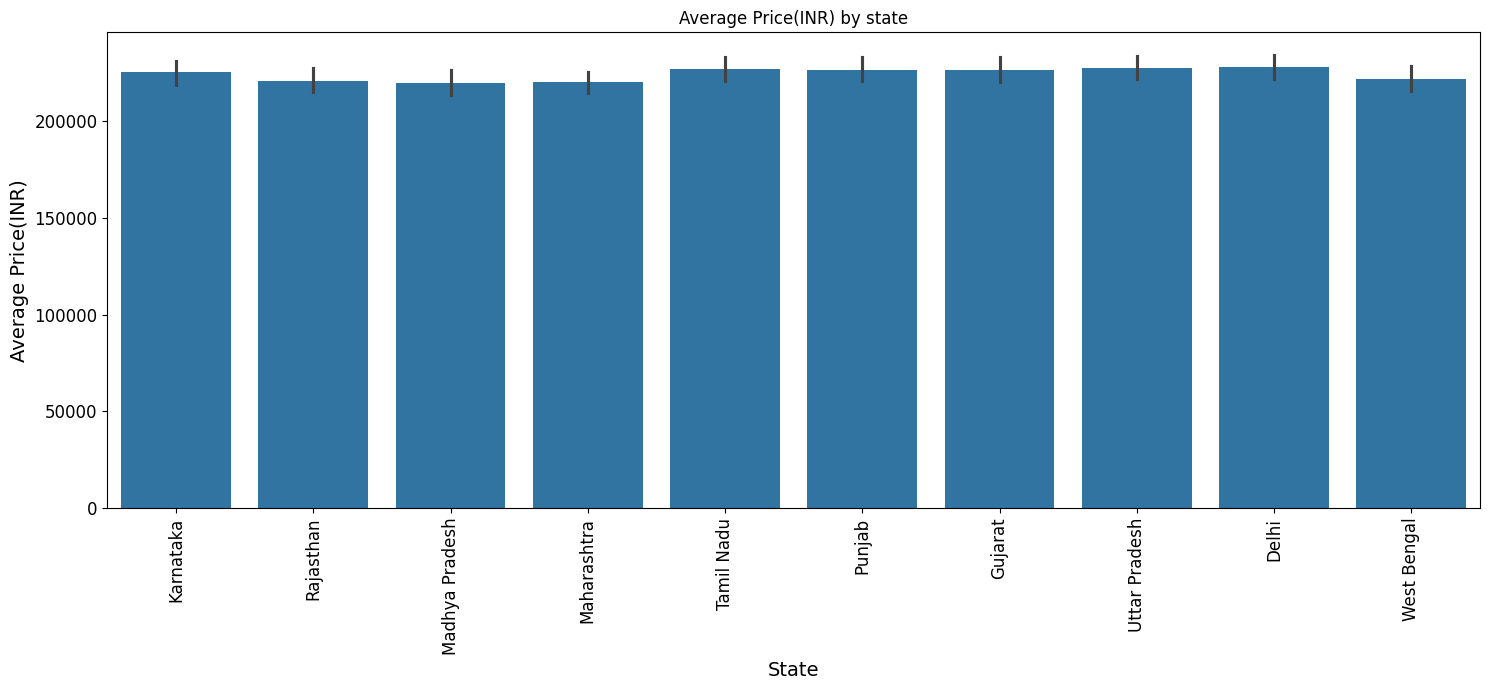

In [9]:
# The Relationship between categorical and numerical columns(for instance, distribution of average price by state)
# State and Price(INR) columns
plt.figure(figsize=(15, 7))
sns.barplot(x='State', y='Price (INR)', data=df)
plt.xticks(rotation=90)
plt.title('Average Price(INR) by state')
plt.xlabel('State')
plt.ylabel('Average Price(INR)')
plt.tight_layout()

Text(0.5, 1.0, 'Correlation Matrix Between Numerical Columns')

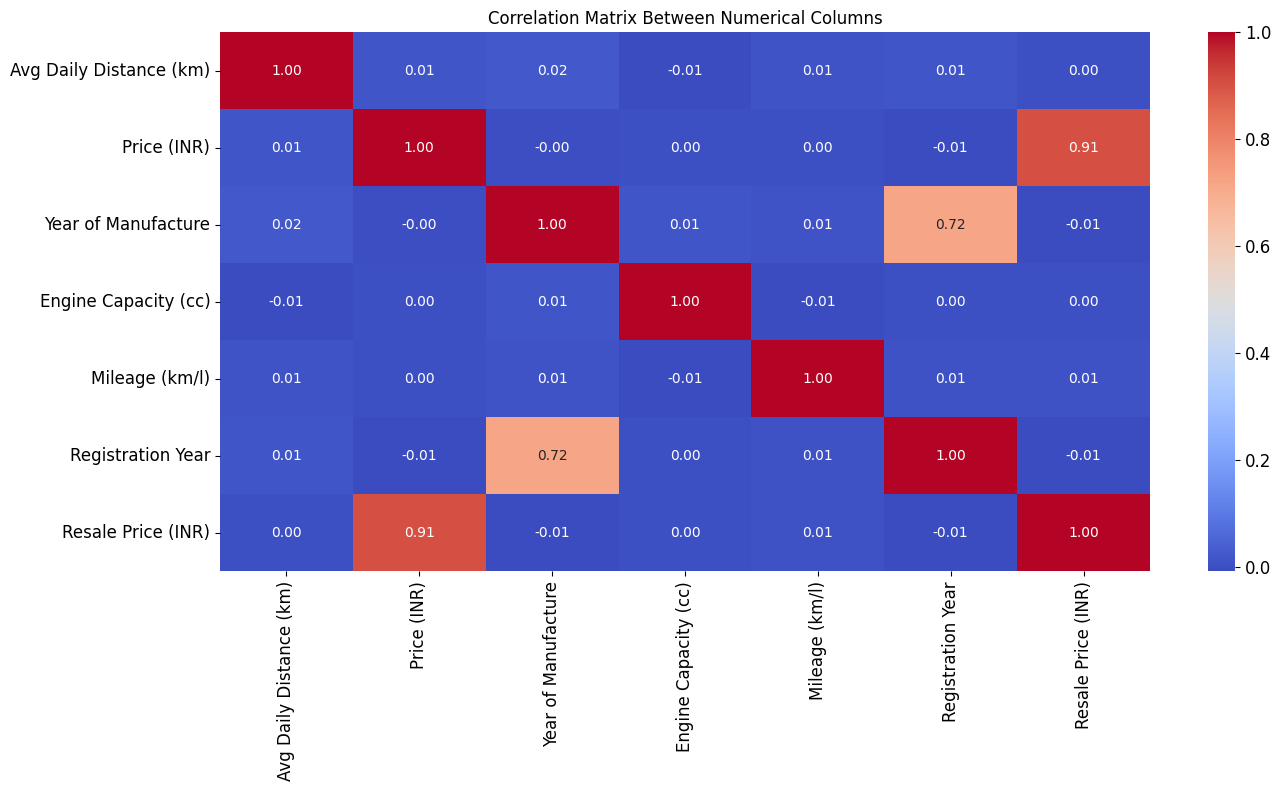

In [10]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Between Numerical Columns')

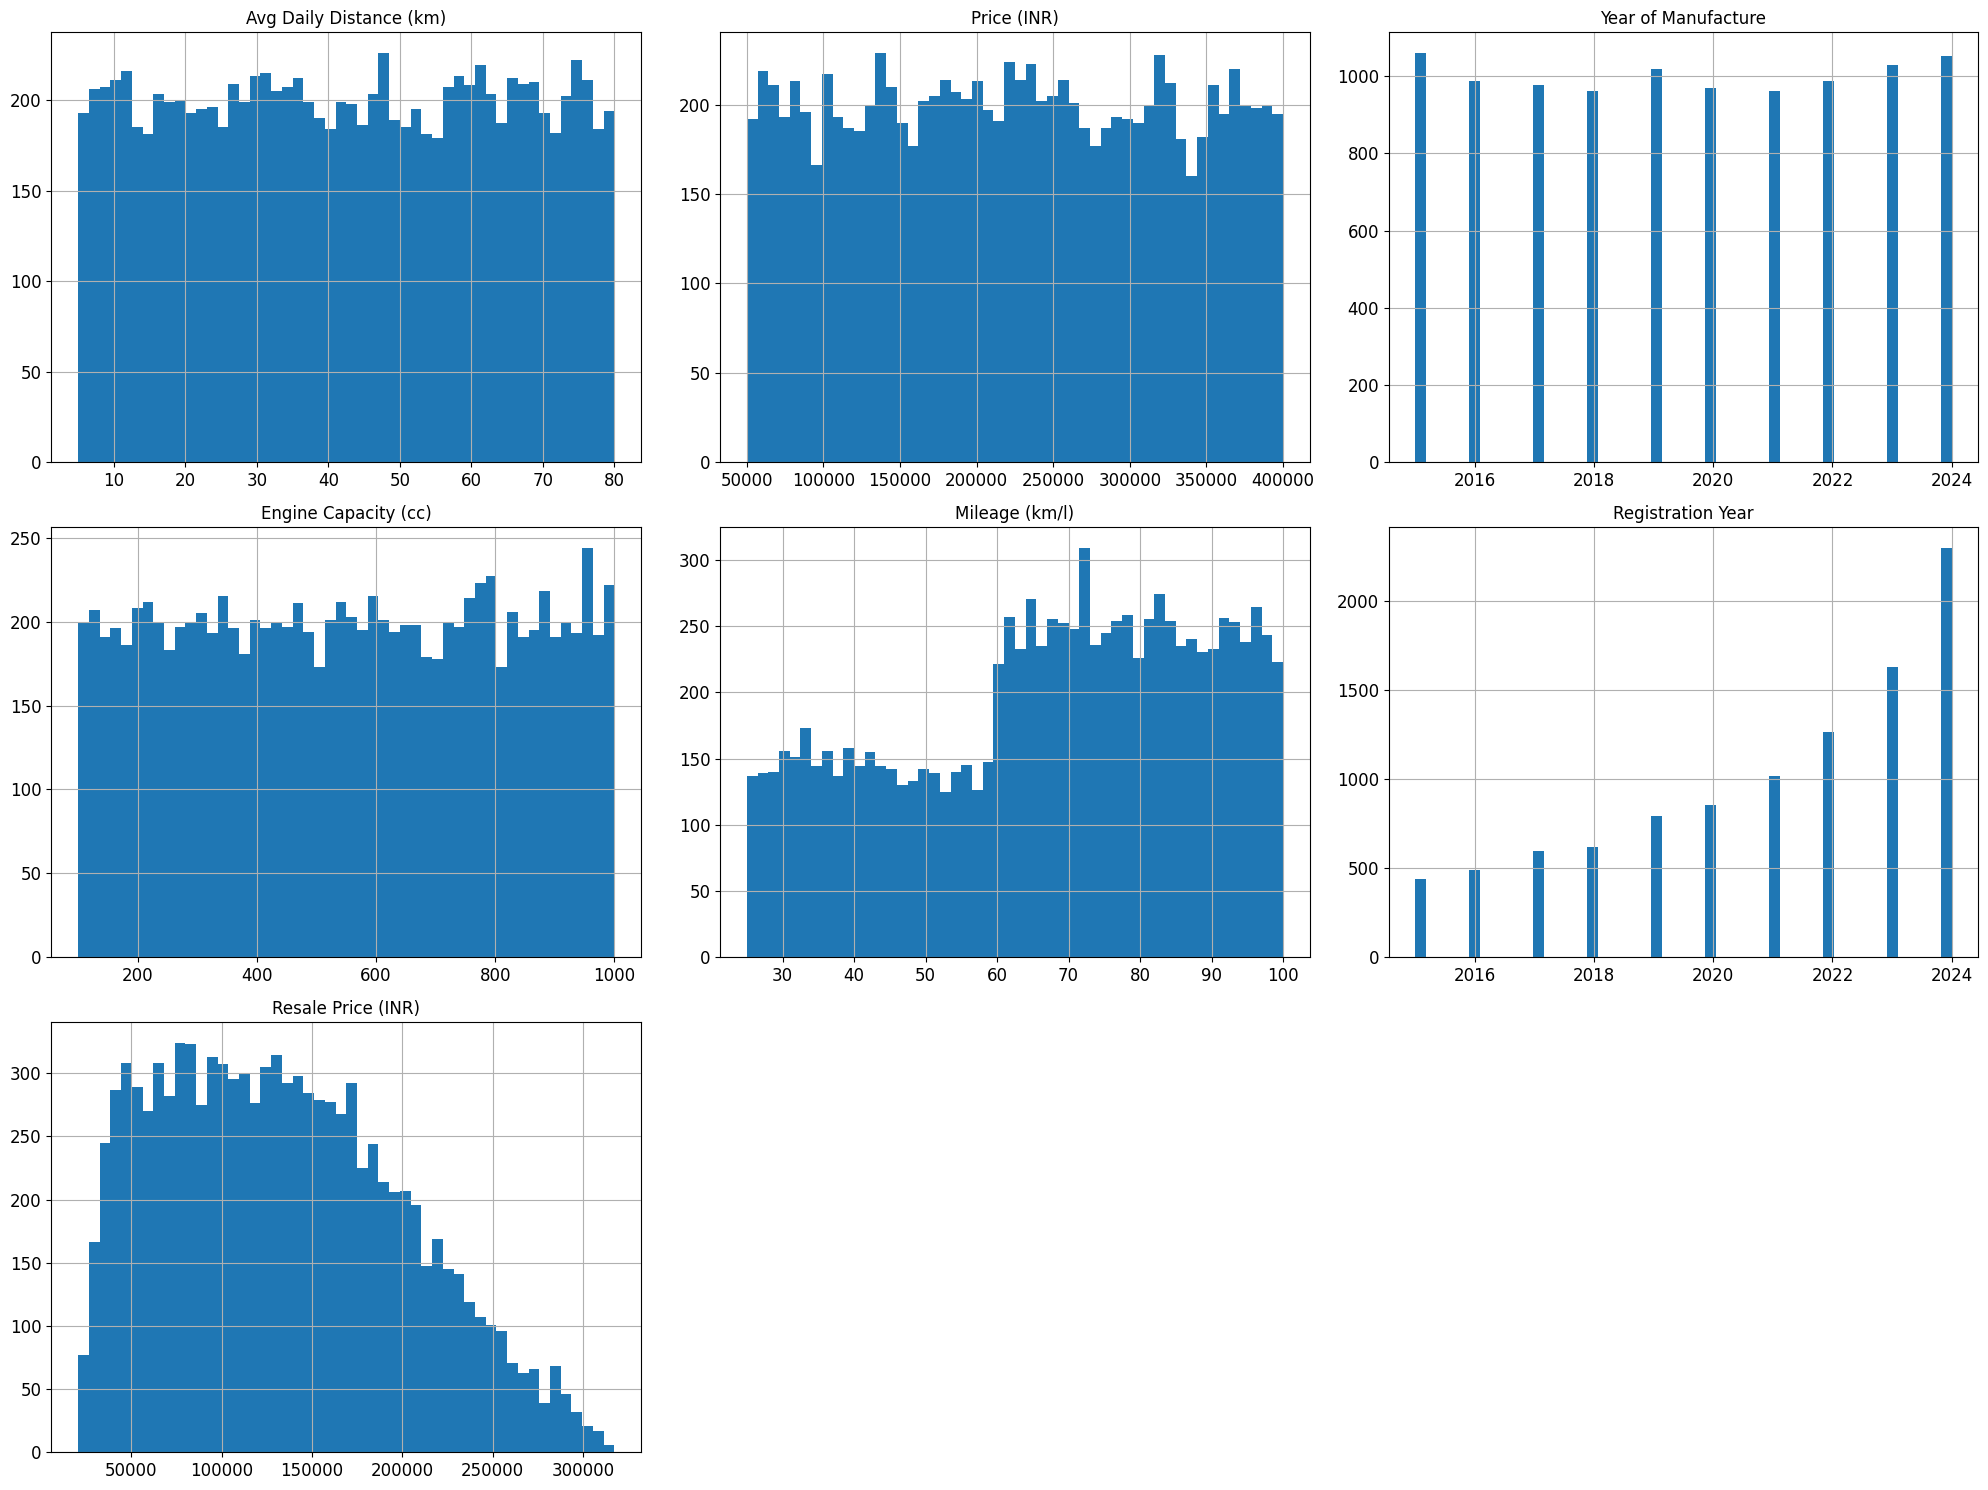

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()

In [12]:
df.isnull().values.any()

np.False_

In [13]:
df.isnull().sum()

State                      0
Avg Daily Distance (km)    0
Brand                      0
Model                      0
Price (INR)                0
Year of Manufacture        0
Engine Capacity (cc)       0
Fuel Type                  0
Mileage (km/l)             0
Owner Type                 0
Registration Year          0
Insurance Status           0
Seller Type                0
Resale Price (INR)         0
City Tier                  0
dtype: int64

In [14]:
df_cat.head()

State          Brand        Model Fuel Type Owner Type  \
0       Karnataka  Royal Enfield   Hunter 350  Electric     Second   
1       Rajasthan          Bajaj  Dominar 400    Hybrid      Third   
2  Madhya Pradesh            KTM     125 Duke    Hybrid     Second   
3       Karnataka       Kawasaki    Ninja 300    Petrol      Third   
4  Madhya Pradesh         Yamaha        FZ V3    Petrol      Third   

  Insurance Status Seller Type City Tier  
0           Active  Individual    Tier 3  
1           Active  Individual    Tier 3  
2           Active      Dealer    Tier 3  
3           Active      Dealer    Tier 1  
4    Not Available  Individual    Tier 3

In [15]:
df_cat.Brand.unique()

array(['Royal Enfield', 'Bajaj', 'KTM', 'Kawasaki', 'Yamaha', 'Hero',
       'TVS', 'Honda'], dtype=object)

In [16]:
df_cat.State.unique()

array(['Karnataka', 'Rajasthan', 'Madhya Pradesh', 'Maharashtra',
       'Tamil Nadu', 'Punjab', 'Gujarat', 'Uttar Pradesh', 'Delhi',
       'West Bengal'], dtype=object)

In [17]:
df_cat["Model"].value_counts(ascending=False) #Ray ZR

Model
Ray ZR             279
NTorq 125          271
Duke 200           270
250 Duke           269
Vulcan S           267
MT-15              267
Classic 350        267
Interceptor 650    264
Pulsar 150         261
Versys 650         261
Hunter 350         259
Glamour            258
Sport              258
Unicorn            257
HF Deluxe          257
FZ V3              256
Ninja 300          256
Ninja 400          255
390 Adventure      254
Z650               252
Ronin              252
Himalayan          249
Avenger 220        249
Xtreme 160R        249
Fascino 125        248
CBR 650R           248
RC 390             248
Passion Pro        247
Shine              244
Dio                242
CT 100             236
Dominar 400        233
R15 V4             233
125 Duke           231
Activa             230
Splendor Plus      228
Platina 110        228
Apache RTR 160     227
Jupiter            226
Meteor 350         214
Name: count, dtype: int64

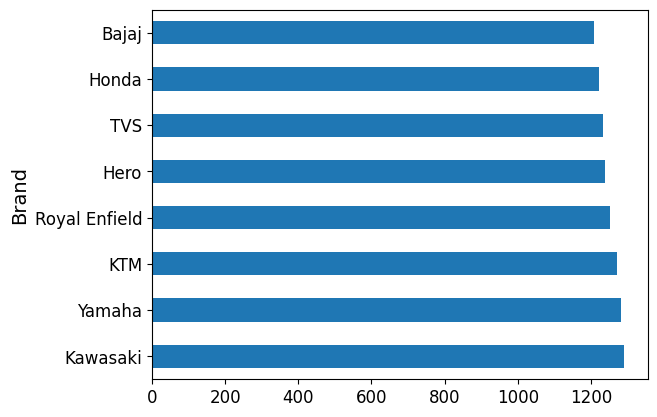

In [18]:
df["Brand"].value_counts().plot.barh();

In [19]:
df_num.head()

Avg Daily Distance (km)  Price (INR)  Year of Manufacture  \
0                    68.84       252816                 2021   
1                    23.80       131100                 2020   
2                    27.67       201016                 2020   
3                    62.85       132482                 2021   
4                    10.62       231796                 2019   

   Engine Capacity (cc)  Mileage (km/l)  Registration Year  Resale Price (INR)  
0                   672           78.41               2024           149934.18  
1                   769           89.98               2023            66960.30  
2                   216           71.46               2023           141522.64  
3                   556           51.73               2021            56057.22  
4                   298           54.72               2019           132538.36

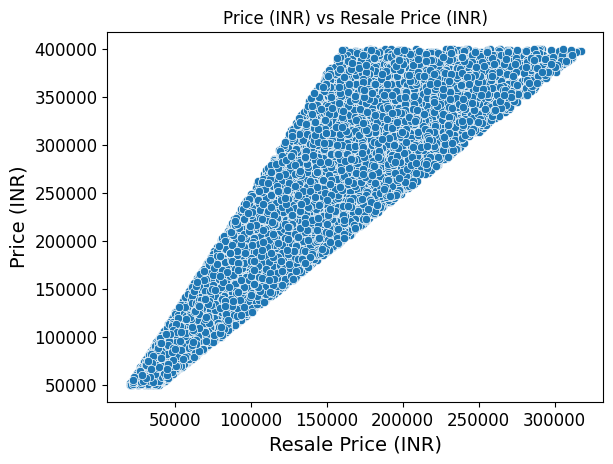

In [20]:
sns.scatterplot(x="Resale Price (INR)", y="Price (INR)", data=df)
plt.title('Price (INR) vs Resale Price (INR)')
plt.xlabel('Resale Price (INR)')
plt.ylabel('Price (INR)')
plt.show()

In [21]:
df.groupby('Brand')['Price (INR)'].mean().sort_values(ascending=False)

Brand
Bajaj            230663.028998
Hero             226001.246973
Yamaha           225921.791115
Kawasaki         223162.601084
Royal Enfield    222886.151636
KTM              222612.517296
TVS              222468.909238
Honda            221076.759214
Name: Price (INR), dtype: float64

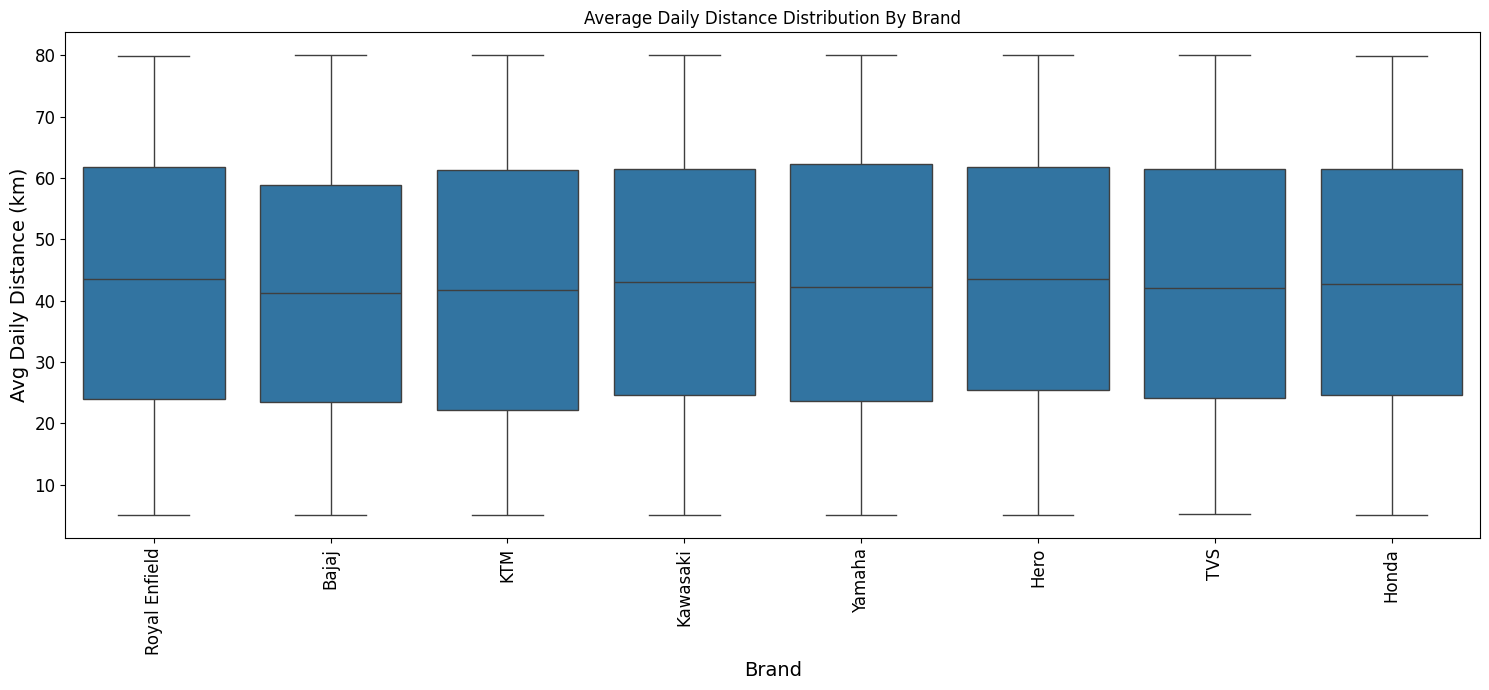

In [22]:
# Brand and Avg Daily Distance relationship
plt.figure(figsize=(15, 7))
sns.boxplot(x='Brand', y='Avg Daily Distance (km)', data=df)
plt.xticks(rotation=90)
plt.title('Average Daily Distance Distribution By Brand')
plt.xlabel('Brand')
plt.ylabel('Avg Daily Distance (km)')
plt.tight_layout()

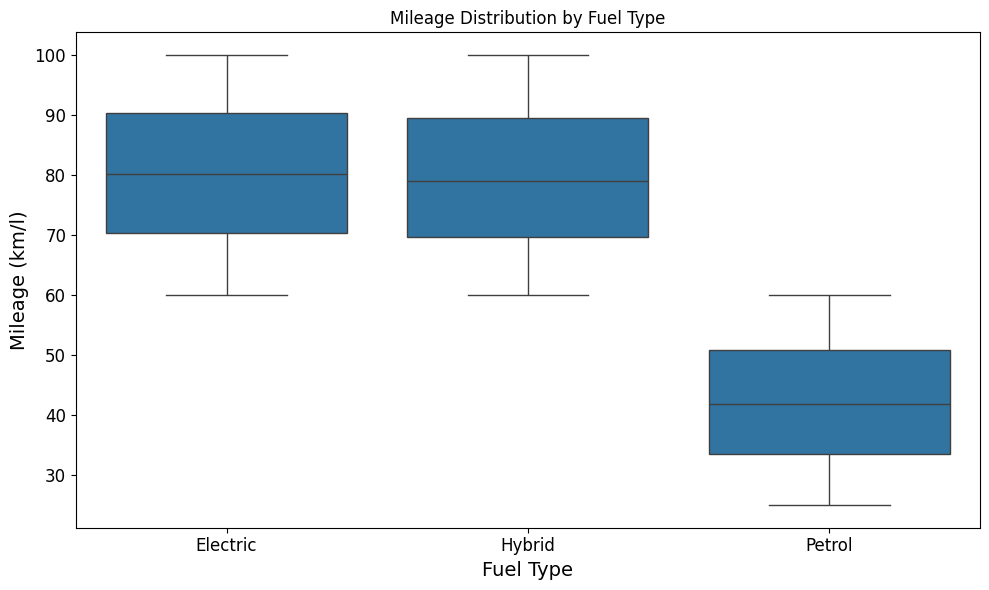

In [23]:
# Fuel Type and Milage
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel Type', y='Mileage (km/l)', data=df)
plt.title('Mileage Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage (km/l)')
plt.tight_layout()

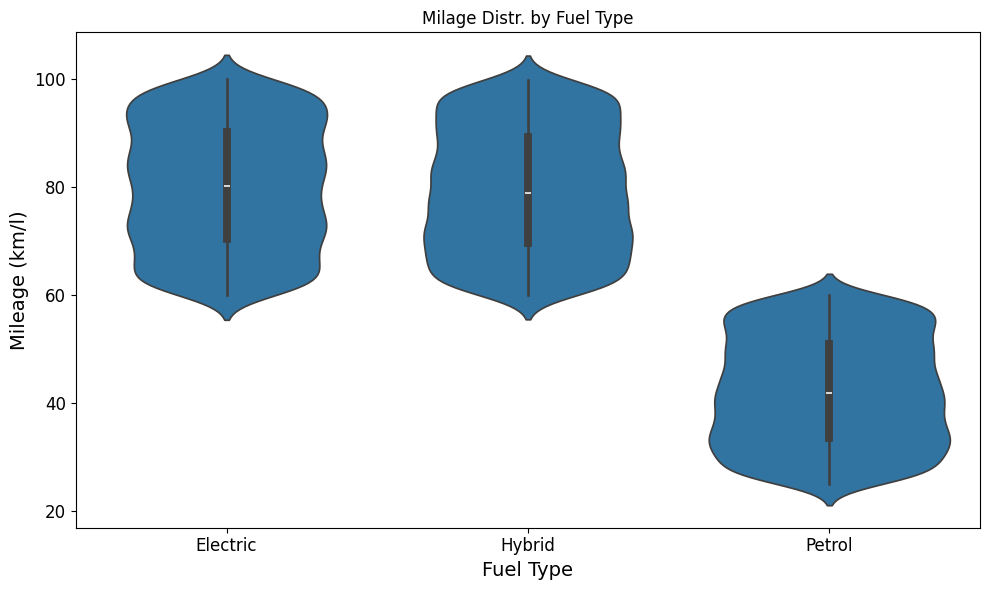

In [24]:
# With Violin Graph
plt.figure(figsize=(10, 6))
sns.violinplot(x='Fuel Type', y='Mileage (km/l)', data=df)
plt.title('Milage Distr. by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage (km/l)')
plt.tight_layout()
plt.show()

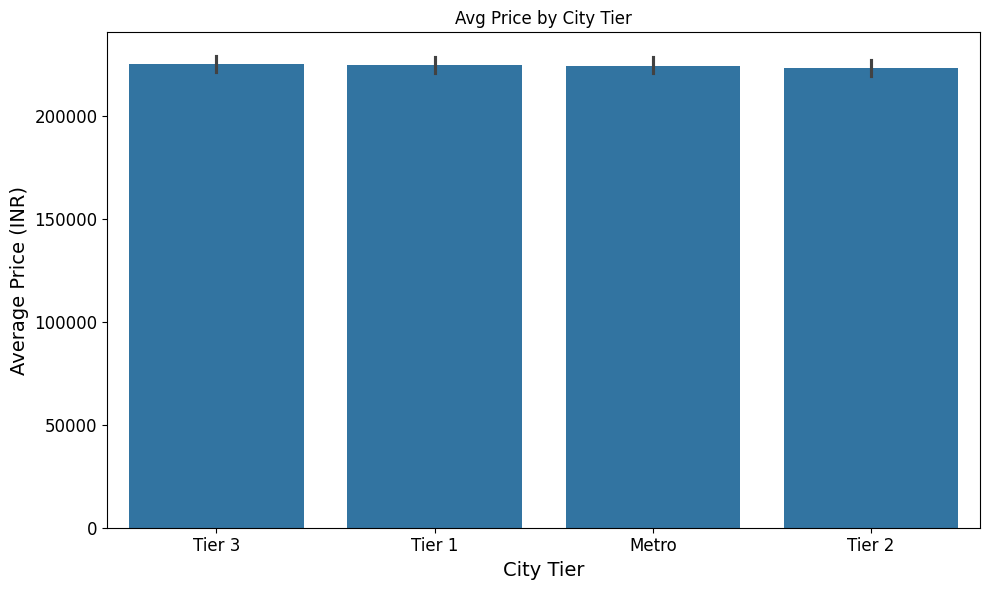

In [25]:
# The Relationship between Avg Price and City Tier
plt.figure(figsize=(10, 6))
sns.barplot(x='City Tier', y='Price (INR)', data=df)
plt.title('Avg Price by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Average Price (INR)')
plt.tight_layout()
plt.show()

State and Brand Distribution


Brand           Bajaj  Hero  Honda  KTM  Kawasaki  Royal Enfield  TVS  Yamaha
State                                                                        
Delhi             118   139    105  139        96            132  121     127
Gujarat           118   113    133  137       133            121  119     128
Karnataka         123   117    118  113       154            122  109     126
Madhya Pradesh    110   118    123   99       138            127  125     133
Maharashtra       144   113    133  134       134            116  131     125
Punjab            140   119    125  147       109            144  133     134
Rajasthan         130   120    120  140       128            122  139     118
Tamil Nadu        102   128    122  114       146            132  114     136
Uttar Pradesh     118   134    126  125       131            131  116     122
West Bengal       104   138    116  124       122            106  127     134

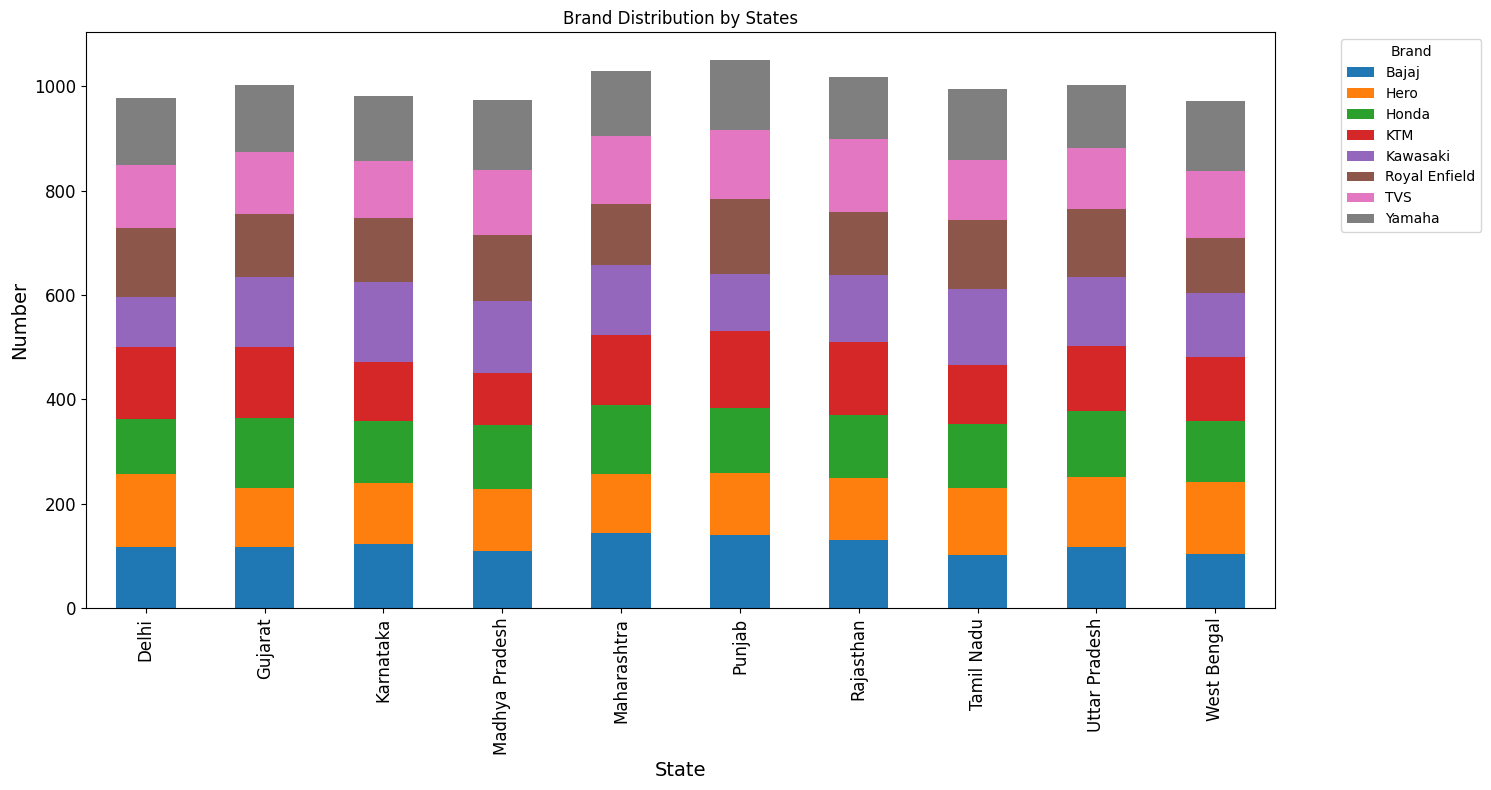

In [26]:
# State and Brand Distribution
state_brand_crosstab = pd.crosstab(df['State'], df['Brand'])
print("State and Brand Distribution")
display(state_brand_crosstab)

# Optional: Visualization the Cross Table (For instance, bar char)
state_brand_crosstab.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Brand Distribution by States')
plt.xlabel('State')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

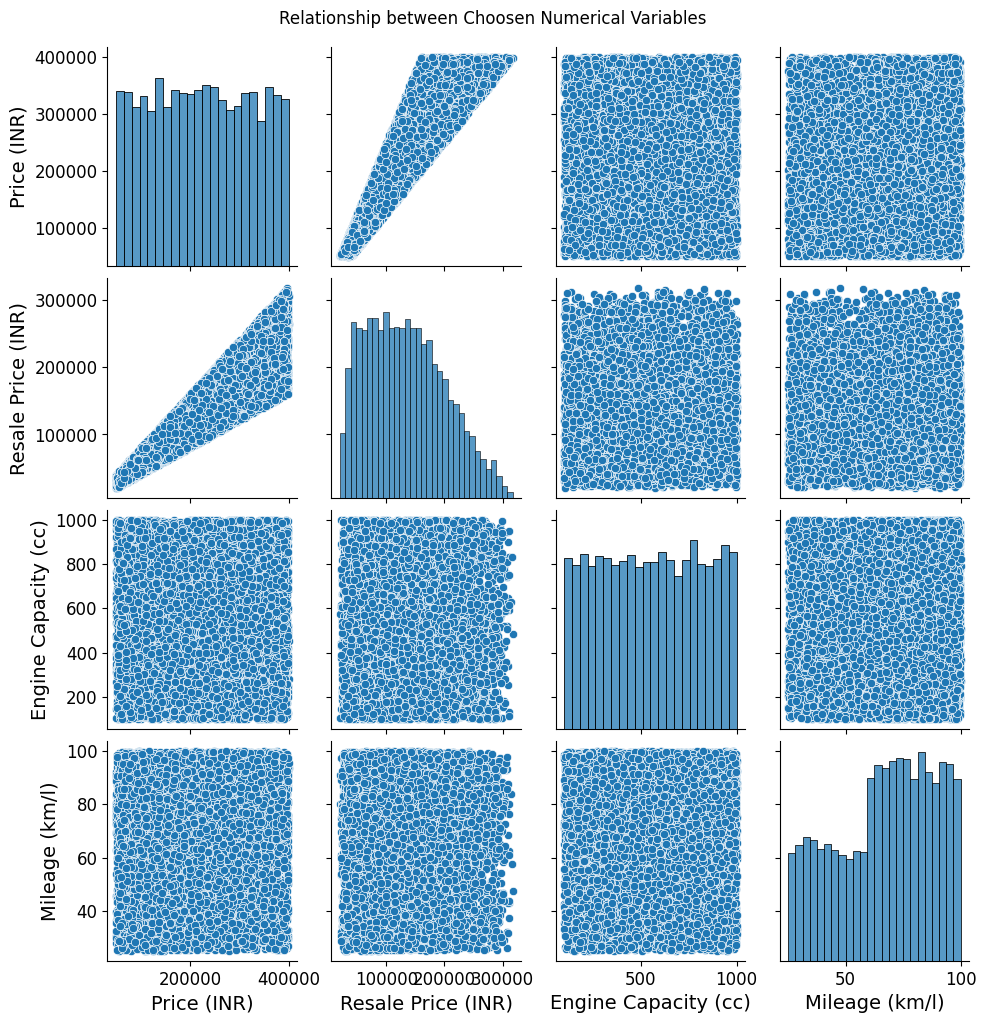

In [27]:
# The multivariate between Numerical Variables (Multivariate - Saçılım Matrisi)
numerical_cols_for_pairplot = ['Price (INR)', 'Resale Price (INR)', 'Engine Capacity (cc)', 'Mileage (km/l)']
sns.pairplot(df[numerical_cols_for_pairplot])
plt.suptitle('Relationship between Choosen Numerical Variables', y=1.02)
plt.show()

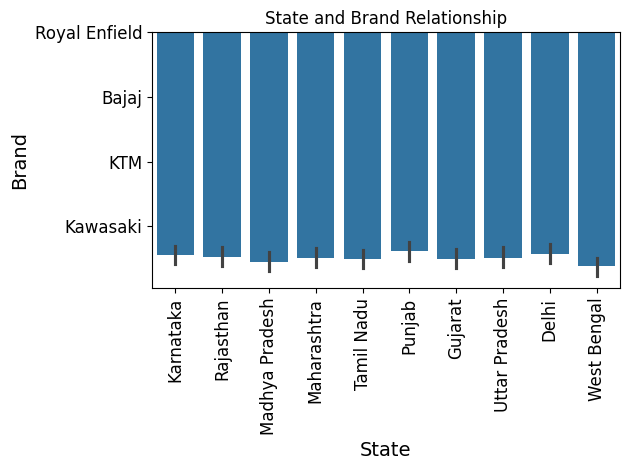

In [28]:
# Relationship between state and brand
sns.barplot(x="State", y="Brand", data=df)
plt.xticks(rotation=90)
plt.title('State and Brand Relationship')
plt.xlabel('State')
plt.ylabel('Brand')
plt.tight_layout()

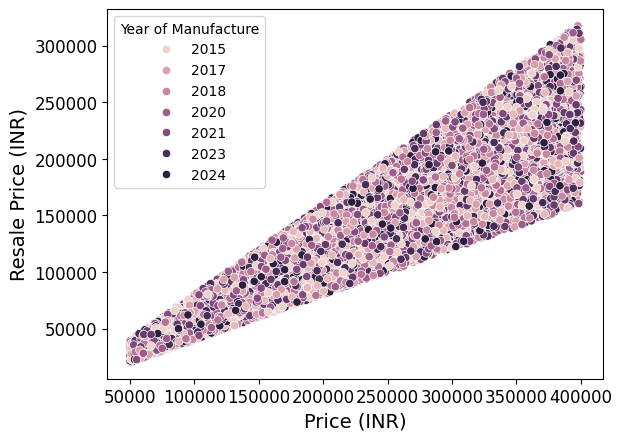

In [29]:
sns.scatterplot(x = "Price (INR)", y = "Resale Price (INR)", hue="Year of Manufacture", data = df);

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


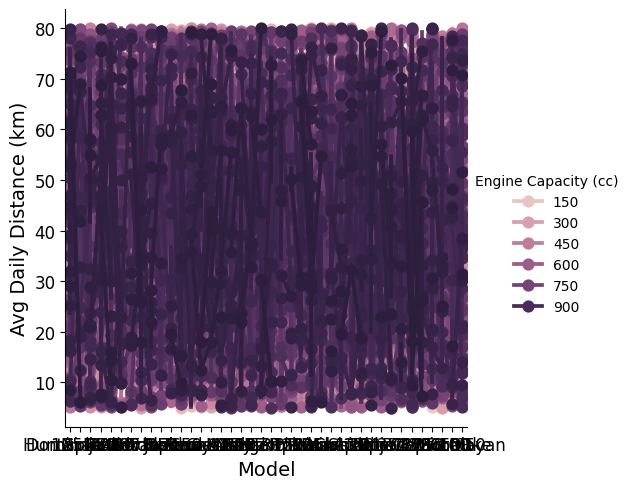

In [30]:
sns.catplot(x = "Model", y = "Avg Daily Distance (km)", hue = "Engine Capacity (cc)", kind = "point", data = df);

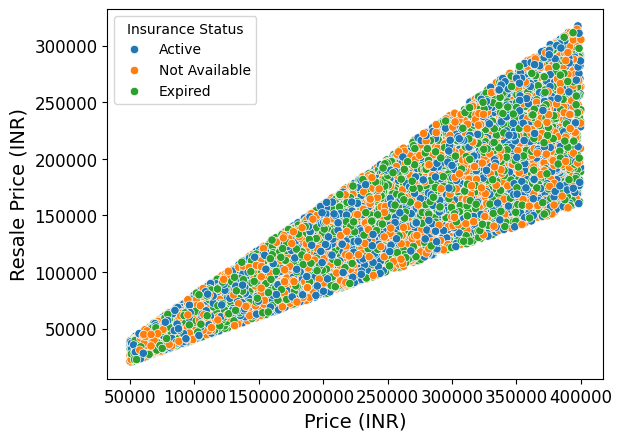

In [31]:
sns.scatterplot(x = "Price (INR)", y = "Resale Price (INR)", hue="Insurance Status", data = df);

Year of Manufacture and Registration Year


Registration Year    2015  2016  2017  2018  2019  2020  2021  2022  2023  \
Year of Manufacture                                                         
2015                  438    77    81    65    69    58    60    69    77   
2016                    0   412    83    69    82    74    70    74    57   
2017                    0     0   432    77    75    72    78    80    75   
2018                    0     0     0   408   105    82    89    87    87   
2019                    0     0     0     0   463   101   130   113   102   
2020                    0     0     0     0     0   469   121   119   127   
2021                    0     0     0     0     0     0   471   152   180   
2022                    0     0     0     0     0     0     0   571   216   
2023                    0     0     0     0     0     0     0     0   707   
2024                    0     0     0     0     0     0     0     0     0   

Registration Year    2024  
Year of Manufacture        
2015                   66  
2016                   66  
2017                   88  
2018                  103  
2019                  110  
2020                  133  
2021                  157  
2022                  200  
2023                  322  
2024                 1051

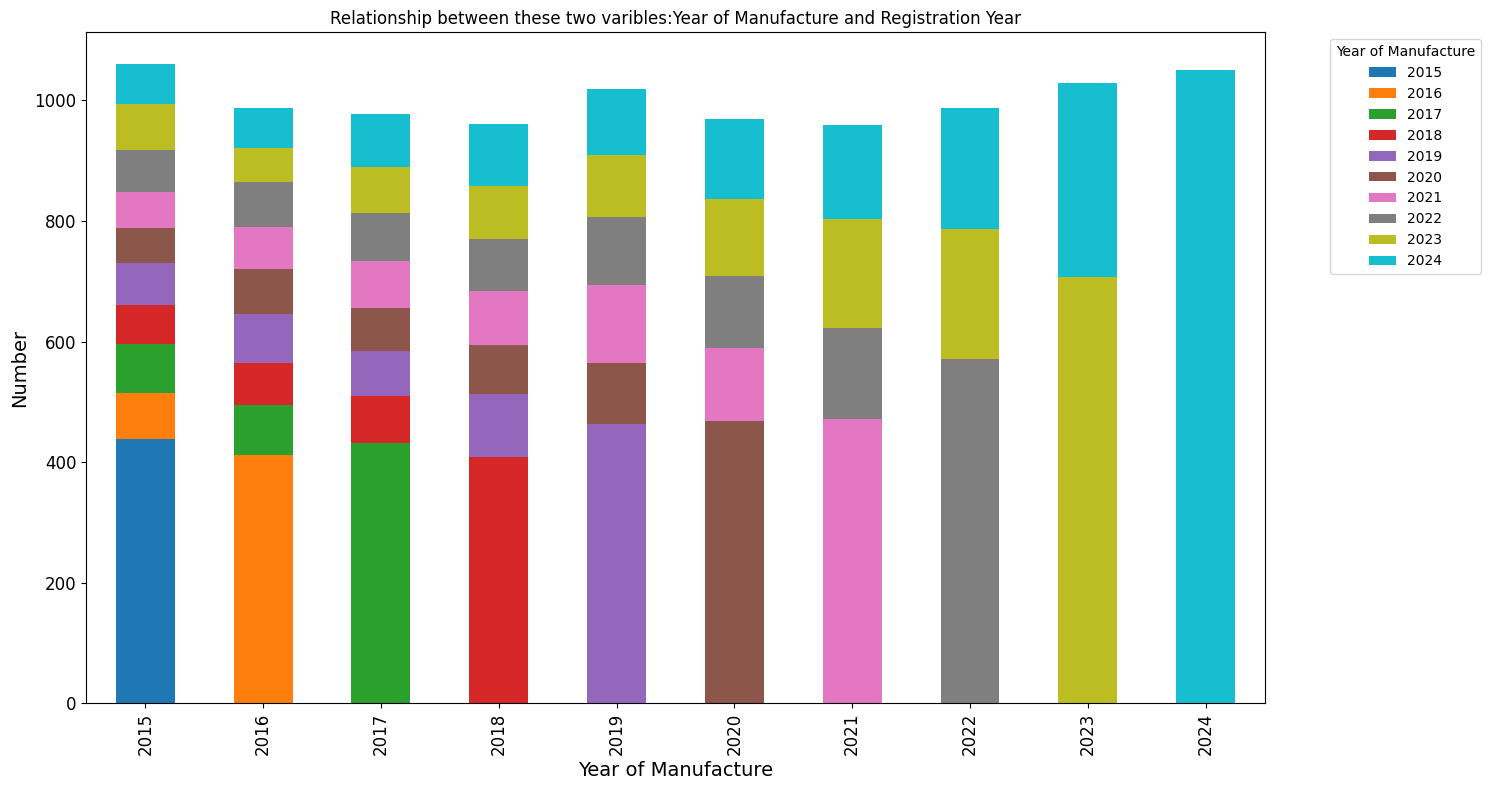

In [32]:
# Year of Manufacture and Registration Year
YofMan_RegYear_crosstab = pd.crosstab(df['Year of Manufacture'], df['Registration Year'])
print("Year of Manufacture and Registration Year")
display(YofMan_RegYear_crosstab)

YofMan_RegYear_crosstab.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Relationship between these two varibles:Year of Manufacture and Registration Year')
plt.xlabel('Year of Manufacture')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.legend(title='Year of Manufacture', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

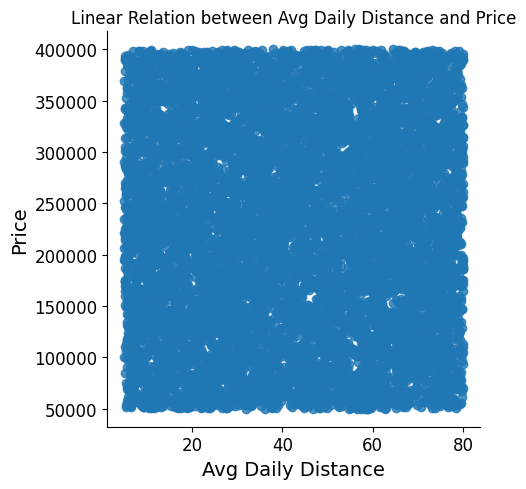

In [33]:
# Linear Relation
sns.lmplot(x='Avg Daily Distance (km)', y='Price (INR)', data=df)
plt.title('Linear Relation between Avg Daily Distance and Price')
plt.xlabel('Avg Daily Distance')
plt.ylabel('Price')
plt.tight_layout()

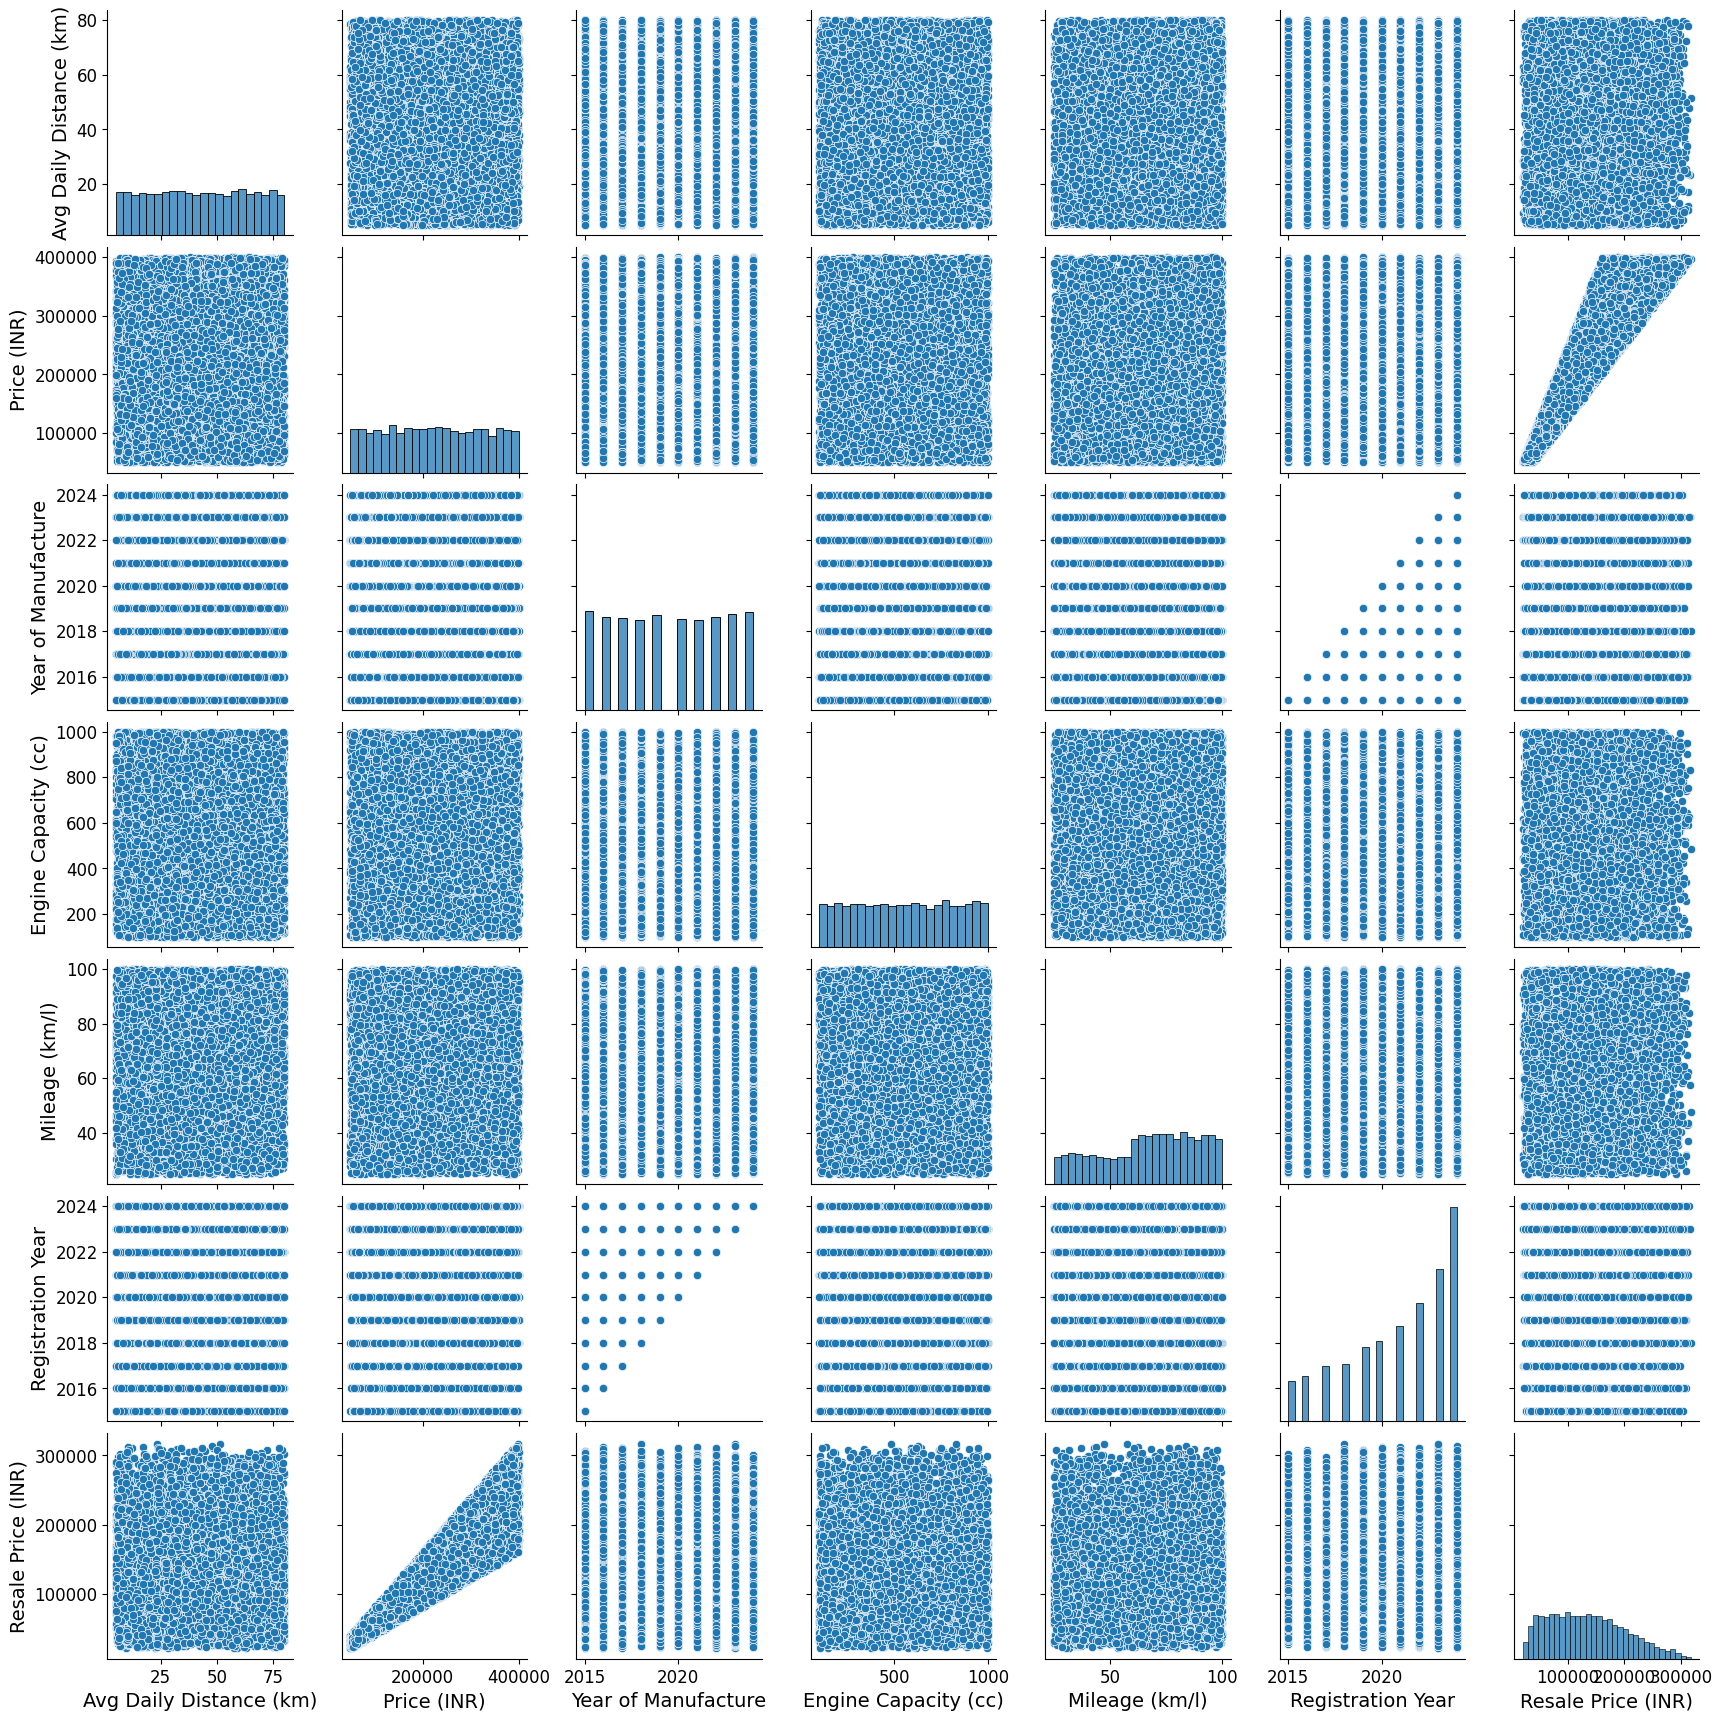

In [34]:
sns.pairplot(df);

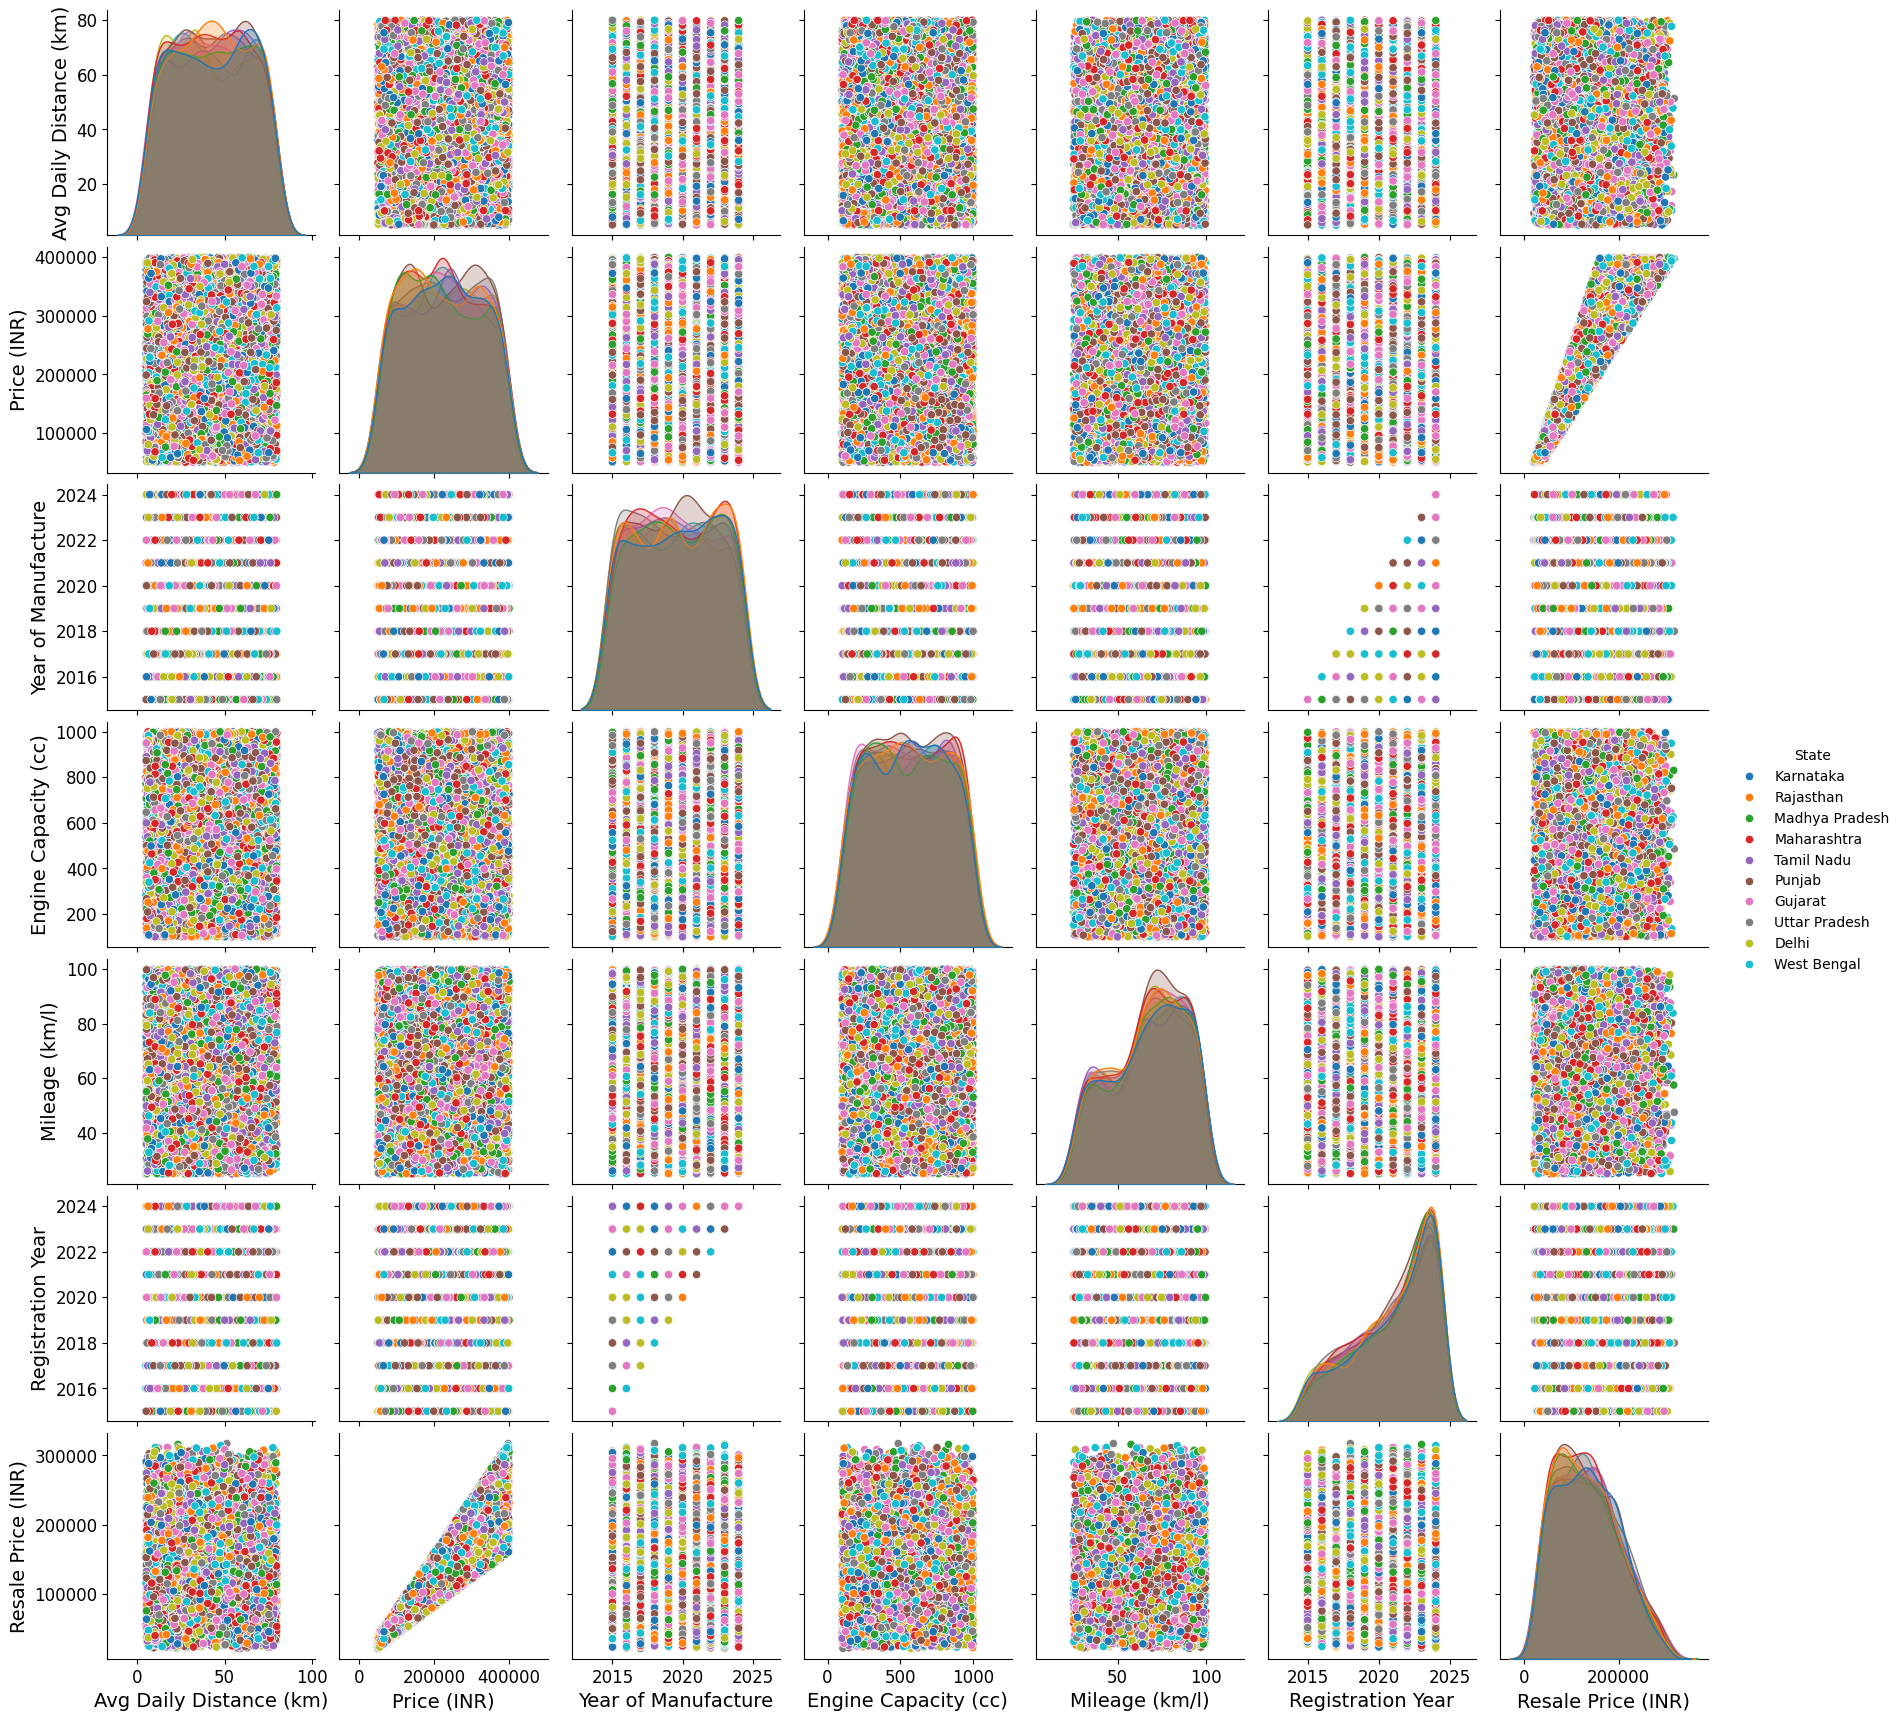

In [35]:
sns.pairplot(df, hue = "State");

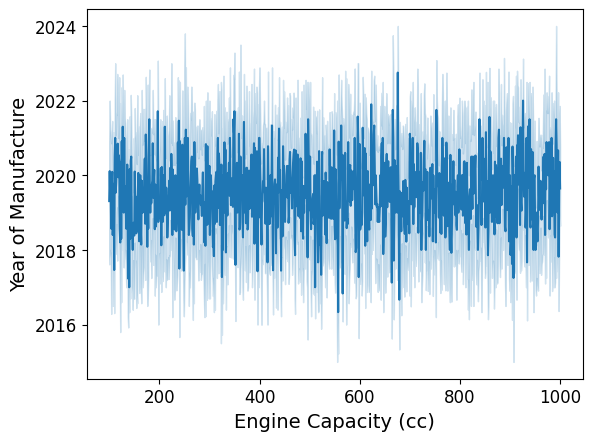

In [36]:
sns.lineplot(x = "Engine Capacity (cc)", y = "Year of Manufacture", data = df);

In [37]:
# 1. Combine 'Year of Manufacture' and 'Registration Year'
df['Bike_Age_At_Registration'] = df['Registration Year'] - df['Year of Manufacture']
df['Current_Bike_Age'] = 2024 - df['Year of Manufacture'] # Assuming current year is 2024

# 2. Create interaction term between 'Brand' and 'Mileage (km/l)'
# This will create new columns for each brand, representing the mileage for that brand
# The Brand column has already been one-hot encoded, so we can directly use the encoded columns
for brand_col in [col for col in df.columns if 'Brand_' in col]:
    df[f'{brand_col}_Mileage_Interaction'] = df[brand_col] * df['Mileage (km/l)']


# 3. Categorize 'Engine Capacity (cc)'
df['Engine_Capacity_Category'] = pd.cut(df['Engine Capacity (cc)'],
                                        bins=[0, 200, 500, 1000],
                                        labels=['Low', 'Medium', 'High'],
                                        right=True)

# 4. Feature based on 'Avg Daily Distance (km)' and 'Fuel Type'
# This is a placeholder, you might need a more sophisticated formula based on fuel consumption
df['Fuel_Efficiency_Indicator'] = df['Avg Daily Distance (km)'] / df['Mileage (km/l)']

# 5. Simplify 'Model' column (Example: Group by top N models, or use a different approach)
# For demonstration, let's keep the top 10 models and group the rest as 'Other'
top_models = df['Model'].value_counts().nlargest(10).index.tolist()
df['Model_Grouped'] = df['Model'].apply(lambda x: x if x in top_models else 'Other')
df = pd.get_dummies(df, columns=['Model_Grouped'], prefix='Model', drop_first=True)


print("DataFrame with new features:")
display(df.head())

DataFrame with new features:


State  Avg Daily Distance (km)          Brand        Model  \
0       Karnataka                    68.84  Royal Enfield   Hunter 350   
1       Rajasthan                    23.80          Bajaj  Dominar 400   
2  Madhya Pradesh                    27.67            KTM     125 Duke   
3       Karnataka                    62.85       Kawasaki    Ninja 300   
4  Madhya Pradesh                    10.62         Yamaha        FZ V3   

   Price (INR)  Year of Manufacture  Engine Capacity (cc) Fuel Type  \
0       252816                 2021                   672  Electric   
1       131100                 2020                   769    Hybrid   
2       201016                 2020                   216    Hybrid   
3       132482                 2021                   556    Petrol   
4       231796                 2019                   298    Petrol   

   Mileage (km/l) Owner Type  ...  Model_Classic 350 Model_Duke 200  \
0           78.41     Second  ...              False          False   
1           89.98      Third  ...              False          False   
2           71.46     Second  ...              False          False   
3           51.73      Third  ...              False          False   
4           54.72      Third  ...              False          False   

  Model_Interceptor 650  Model_MT-15 Model_NTorq 125  Model_Other  \
0                 False        False           False         True   
1                 False        False           False         True   
2                 False        False           False         True   
3                 False        False           False         True   
4                 False        False           False         True   

   Model_Pulsar 150 Model_Ray ZR  Model_Versys 650  Model_Vulcan S  
0             False        False             False           False  
1             False        False             False           False  
2             False        False             False           False  
3             False        False             False           False  
4             False        False             False           False  

[5 rows x 29 columns]

In [38]:
# Identify remaining categorical columns (excluding the ones already encoded or used for grouping)
categorical_cols_to_encode = ['Engine_Capacity_Category']

# One-hot encode the remaining categorical columns
df = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

print("DataFrame after encoding remaining categorical features:")
display(df.head())

DataFrame after encoding remaining categorical features:


State  Avg Daily Distance (km)          Brand        Model  \
0       Karnataka                    68.84  Royal Enfield   Hunter 350   
1       Rajasthan                    23.80          Bajaj  Dominar 400   
2  Madhya Pradesh                    27.67            KTM     125 Duke   
3       Karnataka                    62.85       Kawasaki    Ninja 300   
4  Madhya Pradesh                    10.62         Yamaha        FZ V3   

   Price (INR)  Year of Manufacture  Engine Capacity (cc) Fuel Type  \
0       252816                 2021                   672  Electric   
1       131100                 2020                   769    Hybrid   
2       201016                 2020                   216    Hybrid   
3       132482                 2021                   556    Petrol   
4       231796                 2019                   298    Petrol   

   Mileage (km/l) Owner Type  ...  Model_Interceptor 650 Model_MT-15  \
0           78.41     Second  ...                  False       False   
1           89.98      Third  ...                  False       False   
2           71.46     Second  ...                  False       False   
3           51.73      Third  ...                  False       False   
4           54.72      Third  ...                  False       False   

  Model_NTorq 125  Model_Other Model_Pulsar 150  Model_Ray ZR  \
0           False         True            False         False   
1           False         True            False         False   
2           False         True            False         False   
3           False         True            False         False   
4           False         True            False         False   

   Model_Versys 650  Model_Vulcan S  Engine_Capacity_Category_Medium  \
0             False           False                            False   
1             False           False                            False   
2             False           False                             True   
3             False           False                            False   
4             False           False                             True   

   Engine_Capacity_Category_High  
0                           True  
1                           True  
2                          False  
3                           True  
4                          False  

[5 rows x 30 columns]

In [39]:
df.describe().T

count           mean            std  \
Avg Daily Distance (km)    10000.0      42.533128      21.676985   
Price (INR)                10000.0  224328.722400  100753.660447   
Year of Manufacture        10000.0    2019.510500       2.907668   
Engine Capacity (cc)       10000.0     552.695300     261.176292   
Mileage (km/l)             10000.0      67.188926      20.891728   
Registration Year          10000.0    2020.965100       2.748970   
Resale Price (INR)         10000.0  133828.973998   66613.220382   
Bike_Age_At_Registration   10000.0       1.454600       2.126450   
Current_Bike_Age           10000.0       4.489500       2.907668   
Fuel_Efficiency_Indicator  10000.0       0.719626       0.495685   

                                    min            25%            50%  \
Avg Daily Distance (km)        5.010000      23.907500      42.480000   
Price (INR)                50031.000000  137900.250000  223878.000000   
Year of Manufacture         2015.000000    2017.000000    2019.000000   
Engine Capacity (cc)         100.000000     327.000000     553.000000   
Mileage (km/l)                25.000000      50.680000      69.850000   
Registration Year           2015.000000    2019.000000    2022.000000   
Resale Price (INR)         20532.070000   78680.905000  128148.340000   
Bike_Age_At_Registration       0.000000       0.000000       0.000000   
Current_Bike_Age               0.000000       2.000000       5.000000   
Fuel_Efficiency_Indicator      0.051804       0.354224       0.637323   

                                     75%            max  
Avg Daily Distance (km)        61.352500      80.000000  
Price (INR)                311464.250000  399981.000000  
Year of Manufacture          2022.000000    2024.000000  
Engine Capacity (cc)          780.000000    1000.000000  
Mileage (km/l)                 84.542500     100.000000  
Registration Year            2023.000000    2024.000000  
Resale Price (INR)         181048.192500  317302.450000  
Bike_Age_At_Registration        2.000000       9.000000  
Current_Bike_Age                7.000000       9.000000  
Fuel_Efficiency_Indicator       0.930513       2.948951

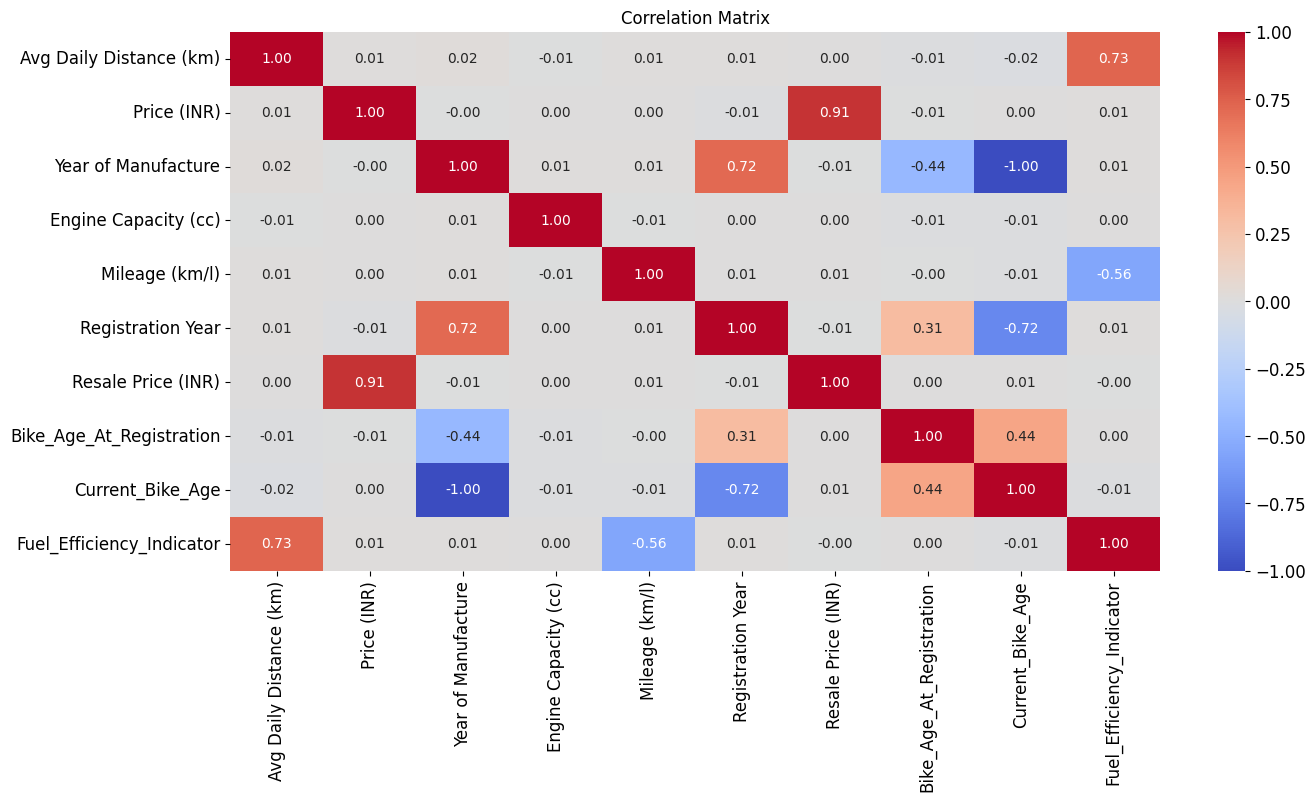

In [40]:
# Remove the non-numerical 'Model' and 'Brand' columns before calculating correlation
df_numerical = df.drop(['Model','Brand'], axis=1)

# Select only numerical columns
df_numerical_only = df_numerical.select_dtypes(include=np.number)


plt.figure(figsize=(15, 7))
sns.heatmap(df_numerical_only.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [41]:
# Remove the non-numerical 'Brand' column before calculating correlation with 'Resale Price (INR)'
df_numerical_for_corr = df_numerical.select_dtypes(include=np.number).copy()

# Calculate correlations with 'Resale Price (INR)'
correlations_with_resale_price = df_numerical_for_corr.corr()['Resale Price (INR)'].sort_values(ascending=False)

print("Correlation with Resale Price (INR):")
display(correlations_with_resale_price)

Correlation with Resale Price (INR):


Resale Price (INR)           1.000000
Price (INR)                  0.905413
Mileage (km/l)               0.007183
Current_Bike_Age             0.006553
Engine Capacity (cc)         0.003116
Avg Daily Distance (km)      0.001510
Bike_Age_At_Registration     0.000921
Fuel_Efficiency_Indicator   -0.001308
Registration Year           -0.006219
Year of Manufacture         -0.006553
Name: Resale Price (INR), dtype: float64

In [42]:
# Calculate correlations with 'Price (INR)'

correlations_with_price = df_numerical_for_corr.corr()['Price (INR)'].sort_values(ascending=False)
print("Correlation with Price (INR):")
display(correlations_with_price)

Correlation with Price (INR):


Price (INR)                  1.000000
Resale Price (INR)           0.905413
Avg Daily Distance (km)      0.012124
Fuel_Efficiency_Indicator    0.010938
Current_Bike_Age             0.002630
Engine Capacity (cc)         0.000894
Mileage (km/l)               0.000498
Year of Manufacture         -0.002630
Bike_Age_At_Registration    -0.007166
Registration Year           -0.008325
Name: Price (INR), dtype: float64

In [43]:
from sklearn.preprocessing import StandardScaler

# Identify original numerical columns to scale (excluding the target variable)
original_numerical_cols = ['Avg Daily Distance (km)', 'Price (INR)', 'Year of Manufacture', 'Engine Capacity (cc)', 'Mileage (km/l)', 'Registration Year', 'Bike_Age_At_Registration', 'Current_Bike_Age', 'Fuel_Efficiency_Indicator']
numerical_cols_to_scale = [col for col in original_numerical_cols if col != 'Resale Price (INR)']

# Add the interaction terms to the list of columns to scale
interaction_cols = [col for col in df_numerical.columns if '_Mileage_Interaction' in col]
numerical_cols_to_scale.extend(interaction_cols)

# Ensure the target variable is not in the list
if 'Resale Price (INR)' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('Resale Price (INR)')


# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df_scaled = df_numerical.copy()
df_scaled[numerical_cols_to_scale] = scaler.fit_transform(df_scaled[numerical_cols_to_scale])

print("DataFrame with scaled numerical features:")
display(df_scaled.head())

DataFrame with scaled numerical features:


State  Avg Daily Distance (km)  Price (INR)  Year of Manufacture  \
0       Karnataka                 1.213646     0.282756             0.512292   
1       Rajasthan                -0.864238    -0.925360             0.168356   
2  Madhya Pradesh                -0.685698    -0.231395             0.168356   
3       Karnataka                 0.937302    -0.911642             0.512292   
4  Madhya Pradesh                -1.472286     0.074118            -0.175579   

   Engine Capacity (cc) Fuel Type  Mileage (km/l) Owner Type  \
0              0.456820  Electric        0.537133     Second   
1              0.828236    Hybrid        1.090968      Third   
2             -1.289214    Hybrid        0.204449     Second   
3              0.012654    Petrol       -0.739991      Third   
4             -0.975234    Petrol       -0.596865      Third   

   Registration Year Insurance Status  ... Model_Interceptor 650  Model_MT-15  \
0           1.104069           Active  ...                 False        False   
1           0.740278           Active  ...                 False        False   
2           0.740278           Active  ...                 False        False   
3           0.012696           Active  ...                 False        False   
4          -0.714885    Not Available  ...                 False        False   

  Model_NTorq 125  Model_Other  Model_Pulsar 150  Model_Ray ZR  \
0           False         True             False         False   
1           False         True             False         False   
2           False         True             False         False   
3           False         True             False         False   
4           False         True             False         False   

   Model_Versys 650  Model_Vulcan S  Engine_Capacity_Category_Medium  \
0             False           False                            False   
1             False           False                            False   
2             False           False                             True   
3             False           False                            False   
4             False           False                             True   

   Engine_Capacity_Category_High  
0                           True  
1                           True  
2                          False  
3                           True  
4                          False  

[5 rows x 28 columns]

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Identify and one-hot encode remaining categorical columns in df_scaled
categorical_cols_in_scaled_df = df_scaled.select_dtypes(include='object').columns
df_scaled_encoded = pd.get_dummies(df_scaled, columns=categorical_cols_in_scaled_df, drop_first=True)


# Define features (X) and target variable (y)
X = df_scaled_encoded.drop(['Resale Price (INR)'], axis=1) # Drop 'Brand' column
y = df_scaled_encoded['Resale Price (INR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [45]:
# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 22687.41
Mean Squared Error (MSE): 835112698.70
Root Mean Squared Error (RMSE): 28898.32
R-squared (R2): 0.81


In [46]:
# Get the model coefficients
coefficients = linear_reg_model.coef_

# Get the feature names
feature_names = X_train.columns

# Create a DataFrame to easily view coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by their absolute value to see the most influential features
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Linear Regression Model Coefficients:")
display(coefficients_df)

Linear Regression Model Coefficients:


Feature   Coefficient  Abs_Coefficient
1                       Price (INR)  60377.808787     60377.808787
16                     Model_Ray ZR   5485.972999      5485.972999
10                   Model_Duke 200   3694.435036      3694.435036
12                      Model_MT-15   3643.508826      3643.508826
21                    State_Gujarat   3561.425646      3561.425646
18                   Model_Vulcan S   3406.834578      3406.834578
29                State_West Bengal   1986.647975      1986.647975
34         Insurance Status_Expired   1954.900275      1954.900275
23             State_Madhya Pradesh   1702.915740      1702.915740
28              State_Uttar Pradesh   1485.693534      1485.693534
17                 Model_Versys 650   1337.507933      1337.507933
13                  Model_NTorq 125   1329.065700      1329.065700
30                 Fuel Type_Hybrid   1325.766621      1325.766621
35   Insurance Status_Not Available   1313.832011      1313.832011
25                     State_Punjab    979.959520       979.959520
24                State_Maharashtra    975.663446       975.663446
8         Fuel_Efficiency_Indicator   -921.912928       921.912928
19  Engine_Capacity_Category_Medium   -858.847419       858.847419
37                 City Tier_Tier 1   -845.478254       845.478254
15                 Model_Pulsar 150    840.324053       840.324053
14                      Model_Other    721.829161       721.829161
36           Seller Type_Individual   -668.237932       668.237932
11            Model_Interceptor 650   -665.993007       665.993007
22                  State_Karnataka    653.925309       653.925309
38                 City Tier_Tier 2    567.718371       567.718371
6          Bike_Age_At_Registration    378.934027       378.934027
32                Owner Type_Second   -342.301204       342.301204
4                    Mileage (km/l)   -266.005285       266.005285
5                 Registration Year    251.250511       251.250511
39                 City Tier_Tier 3    203.338100       203.338100
33                 Owner Type_Third    185.037687       185.037687
27                 State_Tamil Nadu   -183.499074       183.499074
26                  State_Rajasthan    171.884041       171.884041
9                 Model_Classic 350    144.673556       144.673556
3              Engine Capacity (cc)    142.963804       142.963804
0           Avg Daily Distance (km)    109.473171       109.473171
7                  Current_Bike_Age     39.586426        39.586426
2               Year of Manufacture    -39.586426        39.586426
31                 Fuel Type_Petrol    -32.172995        32.172995
20    Engine_Capacity_Category_High      0.078214         0.078214

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators

# Train the model
random_forest_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


In [48]:
# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf) # Calculate Root Mean Squared Error
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Mean Absolute Error (MAE): 23158.31
Mean Squared Error (MSE): 881825129.90
Root Mean Squared Error (RMSE): 29695.54
R-squared (R2): 0.80


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
# You can adjust parameters like n_estimators, learning_rate, max_depth, etc.
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gradient_boosting_model.fit(X_train, y_train)

print("Gradient Boosting Regressor model trained successfully.")

Gradient Boosting Regressor model trained successfully.


In [50]:
# Make predictions on the test set
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb) # Calculate Root Mean Squared Error
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"R-squared (R2): {r2_gb:.2f}")

print("\nLinear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Gradient Boosting Regressor Performance:
Mean Absolute Error (MAE): 22671.67
Mean Squared Error (MSE): 834598525.31
Root Mean Squared Error (RMSE): 28889.42
R-squared (R2): 0.81

Linear Regression Model Performance:
Mean Absolute Error (MAE): 22687.41
Mean Squared Error (MSE): 835112698.70
Root Mean Squared Error (RMSE): 28898.32
R-squared (R2): 0.81


In [51]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting Regressor
# You can adjust the ranges and values based on your knowledge and computational resources
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 4, 5],         # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 4],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]      # Minimum number of samples required to be at a leaf node
}

print("Parameter grid defined:")
print(param_grid)

Parameter grid defined:
{'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 4], 'min_samples_leaf': [1, 2]}


In [52]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
# We will use R-squared as the scoring metric, and 5-fold cross-validation
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("GridSearchCV completed.")
print("Best parameters found: ", grid_search.best_params_)
print("Best R-squared score: ", grid_search.best_score_)

GridSearchCV completed.
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best R-squared score:  0.8197299699252328


In [53]:
# Get the best model from GridSearchCV
best_gradient_boosting_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_gb = best_gradient_boosting_model.predict(X_test)

# Evaluate the best model
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
rmse_best_gb = np.sqrt(mse_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

print("Best Gradient Boosting Regressor Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae_best_gb:.2f}")
print(f"Mean Squared Error (MSE): {mse_best_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_gb:.2f}")
print(f"R-squared (R2): {r2_best_gb:.2f}")

Best Gradient Boosting Regressor Performance on Test Set:
Mean Absolute Error (MAE): 22671.67
Mean Squared Error (MSE): 834598525.31
Root Mean Squared Error (RMSE): 28889.42
R-squared (R2): 0.81


GridSearchCV Results (sorted by R-squared):


n_estimators  learning_rate  max_depth   mean_r2
36           100           0.10          3  0.819730
39           100           0.10          3  0.819503
42           100           0.10          3  0.819288
45           100           0.10          3  0.819288
5            300           0.01          3  0.818319
..           ...            ...        ...       ...
21           100           0.01          4  0.710215
3            100           0.01          3  0.707217
0            100           0.01          3  0.707217
6            100           0.01          3  0.707217
9            100           0.01          3  0.707217

[108 rows x 4 columns]

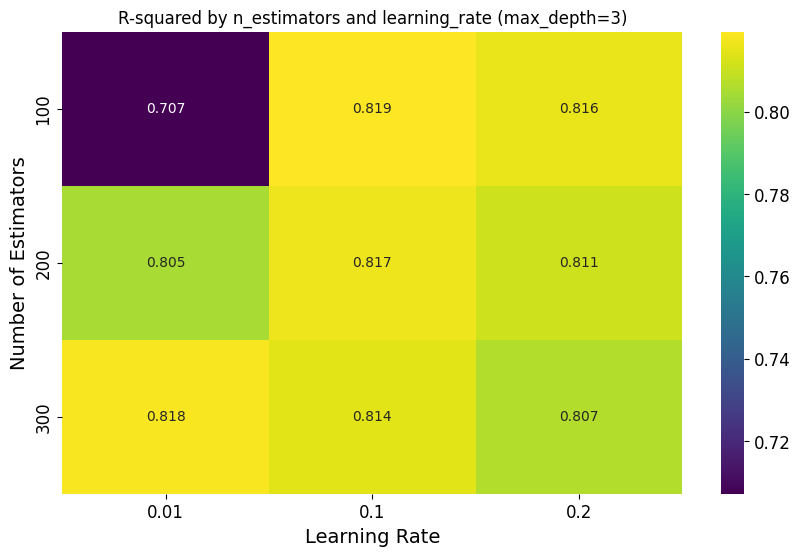

In [57]:
# Get the results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns for visualization
results = results[['param_n_estimators', 'param_learning_rate', 'param_max_depth', 'mean_test_score']]

# Rename columns for clarity
results.rename(columns={'param_n_estimators': 'n_estimators',
                        'param_learning_rate': 'learning_rate',
                        'param_max_depth': 'max_depth',
                        'mean_test_score': 'mean_r2'}, inplace=True)

# Sort results by R-squared score in descending order
results = results.sort_values(by='mean_r2', ascending=False)

print("GridSearchCV Results (sorted by R-squared):")
display(results)

# Visualize the results (e.g., using a heatmap or bar plot)
# For simplicity, let's visualize the R-squared score for different combinations of n_estimators and learning_rate,
# keeping max_depth constant at the best value found. You can adapt this based on your parameters.

# Filter results for the best max_depth
best_max_depth = grid_search.best_params_['max_depth']
results_filtered = results[results['max_depth'] == best_max_depth]

# Create a pivot table for the heatmap
heatmap_data = results_filtered.pivot_table(index='n_estimators', columns='learning_rate', values='mean_r2')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f")
plt.title(f'R-squared by n_estimators and learning_rate (max_depth={best_max_depth})')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define a refined parameter grid for Gradient Boosting Regressor
# Narrowing down the ranges based on previous GridSearchCV results
param_grid_refined = {
    'n_estimators': [80, 100, 120],  # Narrowed range around 100
    'learning_rate': [0.05, 0.1, 0.15], # Narrowed range around 0.1
    'max_depth': [3],         # Keeping the best max_depth from previous run
    'min_samples_split': [2, 3, 4],    # Exploring more values for min_samples_split
    'min_samples_leaf': [1, 2]      # Exploring more values for min_samples_leaf
}

print("Refined parameter grid defined:")
print(param_grid_refined)

# Initialize GridSearchCV with the refined parameter grid
grid_search_refined = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_refined, cv=5, scoring='r2', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_refined.fit(X_train, y_train)

print("\nRefined GridSearchCV completed.")
print("Best parameters found: ", grid_search_refined.best_params_)
print("Best R-squared score: ", grid_search_refined.best_score_)

Refined parameter grid defined:
{'n_estimators': [80, 100, 120], 'learning_rate': [0.05, 0.1, 0.15], 'max_depth': [3], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2]}

Refined GridSearchCV completed.
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 120}
Best R-squared score:  0.8202380679731043


In [59]:
# Get the best model from the refined GridSearchCV
best_gradient_boosting_model_refined = grid_search_refined.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_gb_refined = best_gradient_boosting_model_refined.predict(X_test)

# Evaluate the best model
mae_best_gb_refined = mean_absolute_error(y_test, y_pred_best_gb_refined)
mse_best_gb_refined = mean_squared_error(y_test, y_pred_best_gb_refined)
rmse_best_gb_refined = np.sqrt(mse_best_gb_refined)
r2_best_gb_refined = r2_score(y_test, y_pred_best_gb_refined)

print("Best Gradient Boosting Regressor Performance on Test Set (Refined Tuning):")
print(f"Mean Absolute Error (MAE): {mae_best_gb_refined:.2f}")
print(f"Mean Squared Error (MSE): {mse_best_gb_refined:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_gb_refined:.2f}")
print(f"R-squared (R2): {r2_best_gb_refined:.2f}")

print("\nComparison with previous Gradient Boosting Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_best_gb:.2f}")
print(f"Mean Squared Error (MSE): {mse_best_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_gb:.2f}")
print(f"R-squared (R2): {r2_best_gb:.2f}")

Best Gradient Boosting Regressor Performance on Test Set (Refined Tuning):
Mean Absolute Error (MAE): 22648.62
Mean Squared Error (MSE): 832349935.11
Root Mean Squared Error (RMSE): 28850.48
R-squared (R2): 0.81

Comparison with previous Gradient Boosting Model Performance:
Mean Absolute Error (MAE): 22671.67
Mean Squared Error (MSE): 834598525.31
Root Mean Squared Error (RMSE): 28889.42
R-squared (R2): 0.81


Feature Importances from the Best Gradient Boosting Model:


Feature  Importance
1                       Price (INR)    0.994115
4                    Mileage (km/l)    0.001773
8         Fuel_Efficiency_Indicator    0.001012
3              Engine Capacity (cc)    0.000685
0           Avg Daily Distance (km)    0.000559
22                  State_Karnataka    0.000384
21                    State_Gujarat    0.000323
37                 City Tier_Tier 1    0.000215
6          Bike_Age_At_Registration    0.000181
7                  Current_Bike_Age    0.000164
16                     Model_Ray ZR    0.000133
5                 Registration Year    0.000071
34         Insurance Status_Expired    0.000065
24                State_Maharashtra    0.000064
27                 State_Tamil Nadu    0.000043
38                 City Tier_Tier 2    0.000042
36           Seller Type_Individual    0.000042
12                      Model_MT-15    0.000033
19  Engine_Capacity_Category_Medium    0.000026
33                 Owner Type_Third    0.000019
9                 Model_Classic 350    0.000012
2               Year of Manufacture    0.000011
30                 Fuel Type_Hybrid    0.000011
25                     State_Punjab    0.000011
35   Insurance Status_Not Available    0.000004
14                      Model_Other    0.000001
17                 Model_Versys 650    0.000000
18                   Model_Vulcan S    0.000000
11            Model_Interceptor 650    0.000000
10                   Model_Duke 200    0.000000
13                  Model_NTorq 125    0.000000
15                 Model_Pulsar 150    0.000000
23             State_Madhya Pradesh    0.000000
20    Engine_Capacity_Category_High    0.000000
28              State_Uttar Pradesh    0.000000
26                  State_Rajasthan    0.000000
31                 Fuel Type_Petrol    0.000000
29                State_West Bengal    0.000000
32                Owner Type_Second    0.000000
39                 City Tier_Tier 3    0.000000

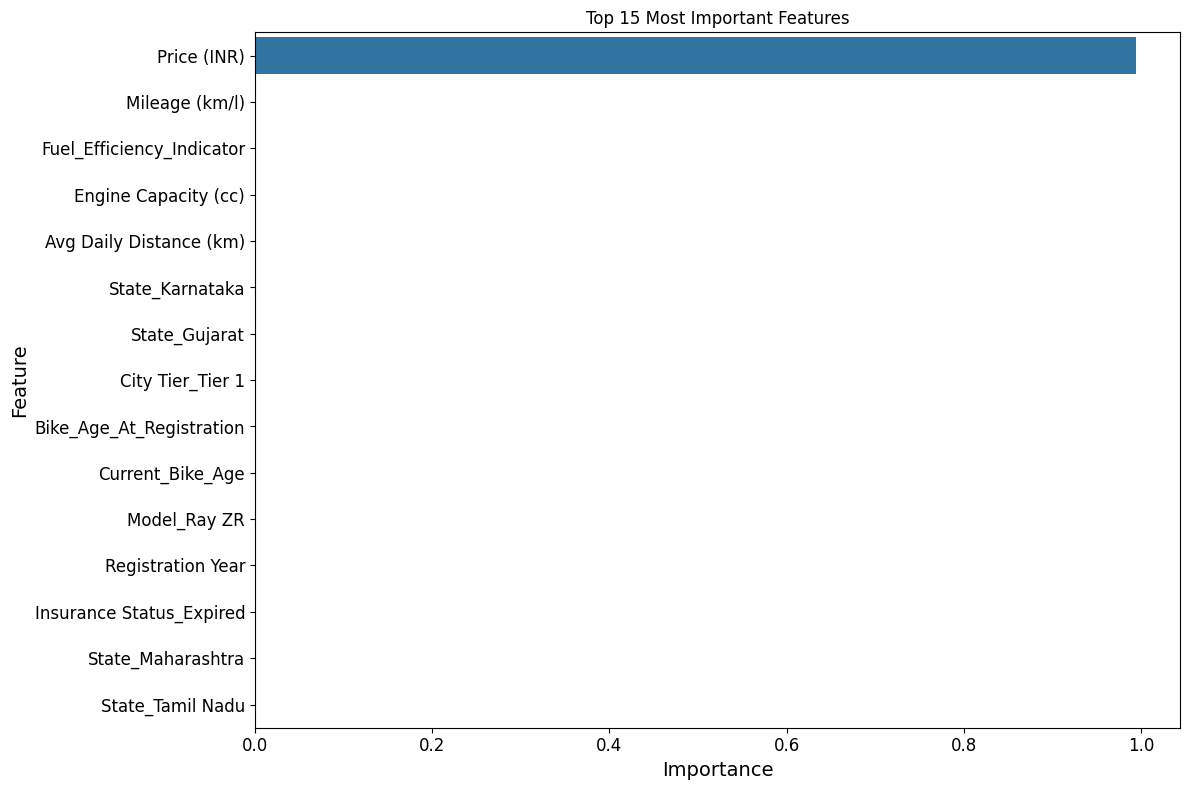

In [60]:
# Get feature importances from the best Gradient Boosting model
feature_importances = best_gradient_boosting_model_refined.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances from the Best Gradient Boosting Model:")
display(feature_importance_df)

# Visualize the top N feature importances (e.g., top 15)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()